In [1]:

import pandas as pd              
import numpy as np               
import matplotlib                
from matplotlib import pyplot as plt
import seaborn as sns            
import sklearn                  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import scipy                     
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
import collections
import zipfile
import requests
import platform
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import yellowbrick as yb
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import NMF
from sklearn.random_projection import GaussianRandomProjection
from scipy.linalg import pinv
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import datetime
from time import time
from sklearn.neural_network import MLPClassifier
import statistics

In [2]:
def getData(file_name, features, target):
    
    data = pd.read_csv(file_name)
    data.head()
    #sns.heatmap(data.corr(), annot=True)
    #data[target].value_counts().plot(kind='bar')
    return data[features], data[target]

In [3]:
def plot_nn(title,ylabel,base,pca,ica,rp,rf):
    hidden_layers = [2, 4, 6, 8, 10, 12,14, 16, 18, 20]
    plt.grid(True)
    plt.title(title)
    plt.xlabel('Hidden Layers')
    plt.ylabel(ylabel)

    plt.plot(hidden_layers, pca, color='green',label='PCA', marker='o')
    plt.plot(hidden_layers, ica, color='blue',label='ICA', marker='o')
    plt.plot(hidden_layers, rp, color='red',label='RP', marker='o')
    plt.plot(hidden_layers, rf, color='purple',label='RF', marker='o')
    plt.plot(hidden_layers, base, color='black',label='Base', marker='o')
    plt.legend()
    plt.show()

In [4]:
def plot_bar(data):
    labels_pred = pd.DataFrame(data = data, columns=['label'])
    labels_pred['label'].value_counts().plot('bar')
    

In [5]:
def plot_nn_newf(title,ylabel,base,kmeans,em):
    hidden_layers = [2, 4, 6, 8, 10, 12,14, 16, 18, 20]
    plt.grid(True)
    plt.title(title)
    plt.xlabel('Hidden Layers')
    plt.ylabel(ylabel)
    plt.plot(hidden_layers, kmeans, color='blue',label='Kmeans', marker='o')
    plt.plot(hidden_layers, em, color='red',label='EM', marker='o')
    plt.plot(hidden_layers, base, color='black',label='Base', marker='o')
    plt.legend()
    plt.show()

In [6]:
def kmeans(X,name):
    '''
    sse = {}
    for k in range(2,10):
        kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=234).fit(X)
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.title("K-Means ({})".format(name))
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.show()
    '''
    kmeans = KMeans(random_state=234)
    kelbow_visualizer(kmeans, X, k=10)
    
    for k in range(2, 10):
        model = SilhouetteVisualizer(KMeans(n_clusters=k, random_state=234))
        model.fit(X)
        model.show()

In [7]:
def kmeans_bar(X, cluster):
    k_means_clustering = KMeans(n_clusters=cluster, random_state=234).fit(X)
    k_means_clustering.predict(X)
    kmeans_labels = pd.DataFrame(data = k_means_clustering.predict(X), columns=['k_means'])
    kmeans_labels.value_counts().plot(kind='bar')




In [8]:
def kmeans_pca_2d(X, cluster):
    k_means_clustering = KMeans(n_clusters=cluster, random_state=234).fit(X)
    k_means_clustering.predict(X)
    kmeans_labels = pd.DataFrame(data = k_means_clustering.predict(X), columns=['k_means'])
   
    pc_df = pd.DataFrame(data = X , 
        columns = ['PC1', 'PC2'])
    pc_df['Cluster'] = kmeans_labels
    sns.lmplot( x="PC1", y="PC2",
          data=pc_df, 
          fit_reg=False, 
          hue='Cluster', # color by cluster
          legend=True,
          scatter_kws={"s": 8}) # specify the point size


In [9]:
def kmeans_pca_3d(X, cluster):
    k_means_clustering = KMeans(n_clusters=cluster, random_state=234).fit(X)
    k_means_clustering.predict(X)
    kmeans_labels = pd.DataFrame(data = k_means_clustering.predict(X), columns=['k_means'])
   
    pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2', 'PC3'])
    Xax = pc_df[:,0]
    Yax = pc_df[:,1]
    Zax = pc_df[:,2]

    cdict = {0:'red',1:'green'}
    labl = {0:'Malignant',1:'Benign'}
    marker = {0:'*',1:'o'}
    alpha = {0:.3, 1:.5}

    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111, projection='3d')

    fig.patch.set_facecolor('white')
    for l in np.unique(kmeans_labels):
     ix=np.where(kmeans_labels==l)
     ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
               label=labl[l], marker=marker[l], alpha=alpha[l])
    # for loop ends
    ax.set_xlabel("First Principal Component", fontsize=14)
    ax.set_ylabel("Second Principal Component", fontsize=14)
    ax.set_zlabel("Third Principal Component", fontsize=14)

    ax.legend()
    plt.show()

In [10]:
def kmeans_pca_3d(X, cluster):
    k_means_clustering = KMeans(n_clusters=cluster, random_state=234).fit(X)
    k_means_clustering.predict(X)
    kmeans_labels = pd.DataFrame(data = k_means_clustering.predict(X), columns=['k_means'])
   
    pc_df = pd.DataFrame(data = X , 
        columns = ['PC1', 'PC2'])
    sns.pairplot(df_iris, hue='species')

In [11]:
def gm_bar(X, cluster):
    gm = GaussianMixture(n_components=cluster, covariance_type='full')
    gm.fit(X)
    gm.predict(X)
    gm_labels = pd.DataFrame(data = gm.predict(X), columns=['gm'])
    gm_labels.value_counts().plot(kind='bar')

In [12]:
def em(X,name):
    
    # Set up a range of cluster numbers to try
    n_range = range(2,15)

    # Create empty lists to store the BIC and AIC values
    bic_score = []
    aic_score = []

    # Loop through the range and fit a model
    for n in n_range:
        gm = GaussianMixture(n_components=n, 
                             random_state=123, 
                             n_init=10)
        gm.fit(X)

        # Append the BIC and AIC to the respective lists
        bic_score.append(gm.bic(X))
        aic_score.append(gm.aic(X))

    plt.plot(n_range, bic_score, '-o',label='BIC', color='orange')
    plt.plot(n_range, aic_score, '-o',label='AIC', color='green')
    plt.ylabel('Score')
    plt.xlabel('Number of Clusters')
    plt.title('BIC and AIC Scores Per Number Of Clusters ({})'.format(name))
    plt.legend()
    plt.grid(True)
    plt.show()
    

In [13]:
def pcaTest(X,name):
    pca = PCA(n_components=X.shape[1], random_state=42)
    pca.fit(X)
    pca_var_ratio = np.cumsum(pca.explained_variance_ratio_ * 100)
    print(pca_var_ratio)
    plt.plot(pca_var_ratio)
    plt.xlabel('Number of components')
    plt.ylabel('Explained variance')
    plt.title('Normalized Mean Kurtosis Value vs. Components {}'.format(name))
    plt.grid(True)
    plt.show()

In [14]:
def icaTest(X,name):
    kurtosis_values = []
    for i in range(1,X.shape[1]):
        X_ICA = FastICA(n_components = i,max_iter=1000).fit_transform(X)
        kur = scipy.stats.kurtosis(X_ICA)
        kurtosis_values.append(np.mean(kur)/i)
    kurtosis_values = np.array(kurtosis_values)
    print (np.argmax(kurtosis_values)+1)
    plt.plot(np.arange(1,X.shape[1]),kurtosis_values)
    plt.xlabel('Components')
    plt.ylabel('Mean Kurtosis Value')
    plt.title('Mean Kurtosis Value vs. Components {}'.format(name))
    plt.grid(True)
    plt.show()

In [15]:
def rp(X,name):
    reconstruction_error = []

    for i in range(1, X.shape[1]+1):
        rp = GaussianRandomProjection(n_components = i, random_state=234)
        rp.fit(X)
        trans = rp.transform(X)
        pinv = np.linalg.pinv(np.transpose(rp.components_))
        X_recons = np.dot(trans, pinv)
        X_recons = pd.DataFrame(data=X_recons, columns=X.columns)
        rmse = np.sqrt(mean_squared_error(X, X_recons))
        reconstruction_error.append(rmse/100)

    print(reconstruction_error)
    plt.plot(range(1, X.shape[1]+1),reconstruction_error,marker='o')
    plt.title("RP")
    plt.xlabel('Number of components')
    plt.ylabel('Reconstruction error (RMSE)')   
    plt.grid(True)
    plt.show()



In [16]:
def rp2(X,name):
    reconstruction_error = []
    reconstruction_error_std = []

    for i in range(1, X.shape[1]+1):
        reconstruction_error_list = []
        for counter in range(1,100):
            rp = GaussianRandomProjection(n_components = i, random_state=234+counter)
            rp.fit(X)
            trans = rp.transform(X)
            pinv = np.linalg.pinv(np.transpose(rp.components_))
            X_recons = np.dot(trans, pinv)
            X_recons = pd.DataFrame(data=X_recons, columns=X.columns)
            rmse = np.sqrt(mean_squared_error(X, X_recons))
            reconstruction_error_list.append(rmse/100)
        reconstruction_error.append(statistics.mean(reconstruction_error_list))
        reconstruction_error_std.append(statistics.pstdev(reconstruction_error_list))

    print(reconstruction_error)
    numpy_err = np.array(reconstruction_error)
    numpy_std = np.array(reconstruction_error_std)
    plt.plot(range(1, X.shape[1]+1),reconstruction_error,marker='o',color='blue')
    plt.plot(range(1, X.shape[1]+1),numpy_err-numpy_std,color='red')
    plt.plot(range(1, X.shape[1]+1),numpy_err+numpy_std,color='red')
 
    plt.title("RP")
    plt.xlabel('Number of components')
    plt.ylabel('Reconstruction error (RMSE)')   
    plt.grid(True)
    plt.show()

In [17]:
def lda(X,Y,name):
    lda = LinearDiscriminantAnalysis(solver= 'eigen')
    lda.fit(X, Y.values.ravel())
    lda_var_ratio = np.cumsum(lda.explained_variance_ratio_ * 100)
    print(lda_var_ratio)
    fig = plt.figure()
    plt.plot(lda_var_ratio)
    plt.xlabel('Number of components')
    plt.ylabel('Explained variance')
    plt.grid(True)
    plt.show()

In [18]:
def NN(X_train, X_test, y_train, y_test):
    hidden_layer_sizes = [2, 4, 6, 8, 10, 12,14, 16, 18, 20]
    train_score = []
    test_score = []
    train_time = []
    test_time = []
    for i in hidden_layer_sizes:
        mlp_model = MLPClassifier(hidden_layer_sizes=(i,),random_state=234,max_iter=5000)
        
        start_time = time() * 1000
        mlp_model.fit(X=X_train, y=y_train)
        end_time = time() * 1000
        print ("Training Time:",end_time-start_time) 
        train_time.append(end_time-start_time)
        
        y_train_predict = mlp_model.predict(X_train)
        train_accuracy = f1_score(y_train, y_train_predict,average='macro')
        train_score.append(train_accuracy)
        
        start_time = time() * 1000
        y_val_test_predict = mlp_model.predict(X_test)
        test_accuracy = f1_score(y_test, y_val_test_predict,average='macro')
        end_time = time() * 1000
        print ("Testing Time:",end_time-start_time) 
        test_time.append(end_time-start_time)
        test_score.append(test_accuracy)
    return train_score, test_score, train_time, test_time


Wine tests 

In [19]:
def wine():
    features = ['fixed_acidity','volatile_acidity','citric_acid',
                'residual_sugar','chlorides','free_sulfur_dioxide',
                'total_sulfur_dioxide','density','pH','sulphates','alcohol']
    target = ['quality']
    file_name = "./white_wine_updated.csv"
    data_name = "wine"
    X, Y = getData(file_name, features, target)
    return X,Y,data_name
    '''
    print (X.shape)
    print ("Kmeans")
    kmeans(X,data_name)
    print ("EM")
    em(X,data_name)
    print("RM")
    rp(X,data_name)
    print("LDA")
    lda(X,Y,data_name)
    '''

In [20]:
def divorce():
    features = ['Atr1', 'Atr2', 'Atr3', 'Atr4', 'Atr5', 'Atr6', 'Atr7', 'Atr8', 'Atr9', 'Atr10', 'Atr11', 'Atr12',
                'Atr13', 'Atr14', 'Atr15', 'Atr16', 'Atr17', 'Atr18', 'Atr19', 'Atr20', 'Atr21', 'Atr22', 'Atr23',
                'Atr24', 'Atr25', 'Atr26', 'Atr27', 'Atr28', 'Atr29', 'Atr30', 'Atr31', 'Atr32', 'Atr33', 'Atr34',
                'Atr35', 'Atr36', 'Atr37', 'Atr38', 'Atr39', 'Atr40', 'Atr41', 'Atr42', 'Atr43', 'Atr44', 'Atr45',
                'Atr46', 'Atr47', 'Atr48', 'Atr49', 'Atr50', 'Atr51', 'Atr52', 'Atr53', 'Atr54']
    target = ['Class']
    file_name = "./divorce_updated.csv"
    data_name = "divorce"
    X, Y = getData(file_name, features, target)
    return X,Y,data_name
    print (X.shape)

    kmeans(X,data_name)
    em(X,data_name)

In [21]:
X,Y,data_name = wine()

<AxesSubplot:xlabel='quality'>

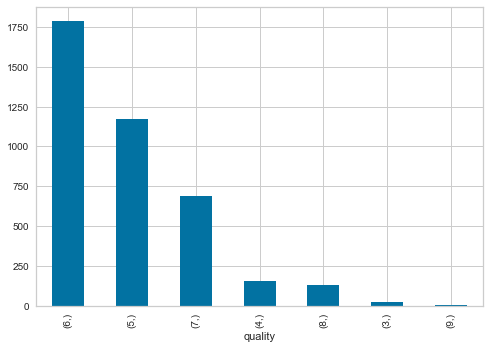

In [22]:
Y.value_counts().plot(kind='bar')

<AxesSubplot:>

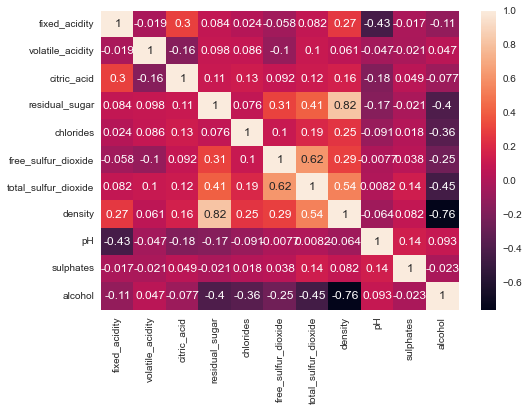

In [23]:
sns.heatmap(X.corr(), annot=True)

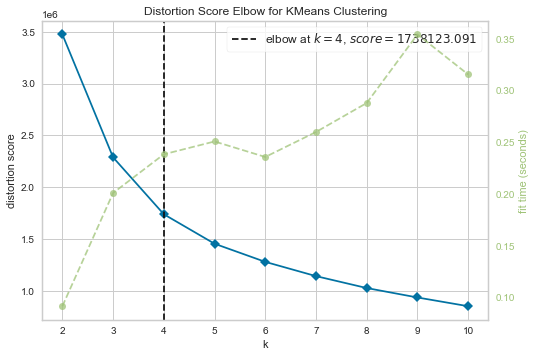

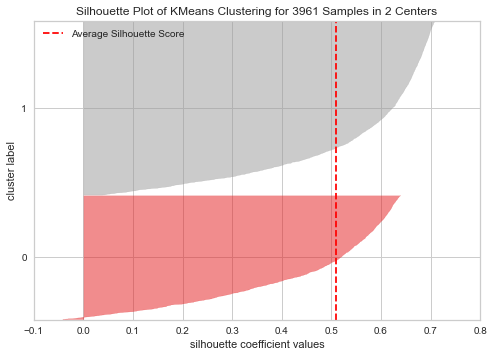

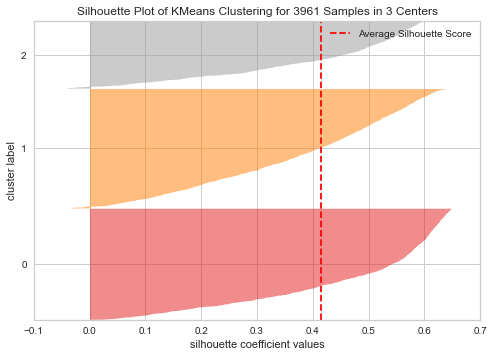

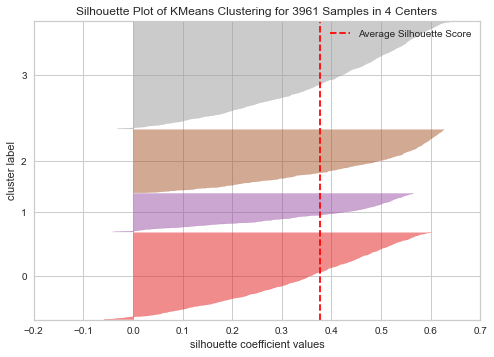

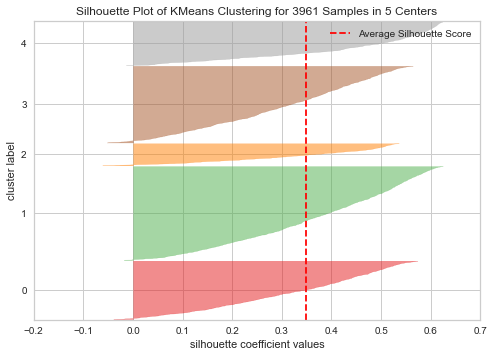

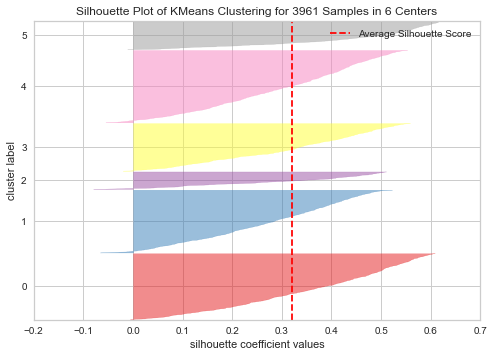

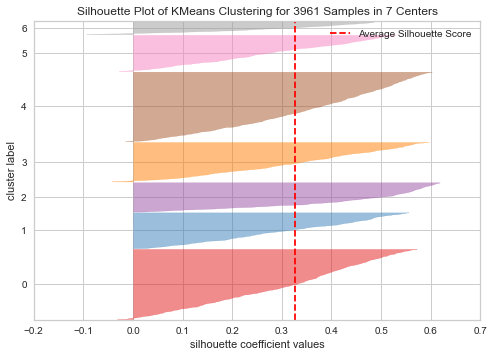

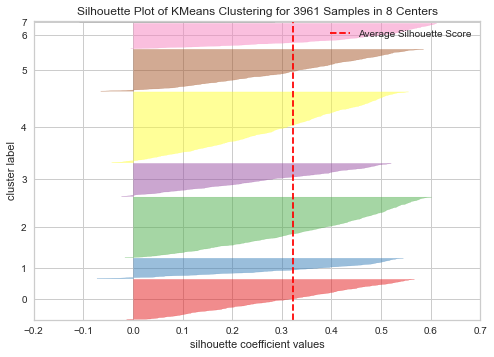

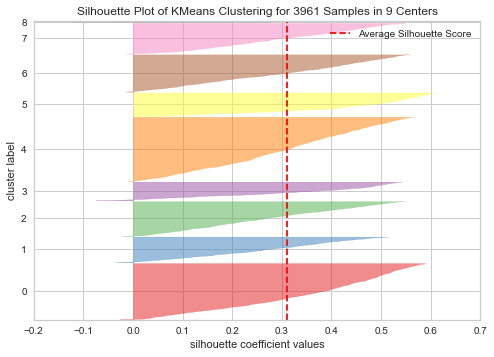

In [24]:
kmeans(X,data_name)

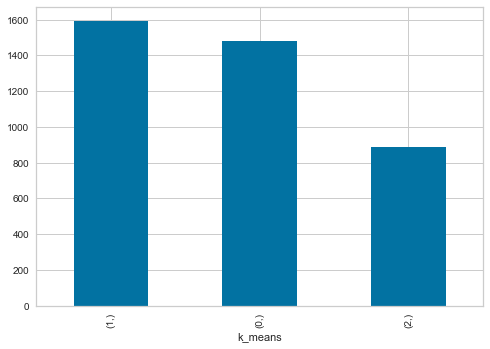

In [25]:
kmeans_bar(X, 3)

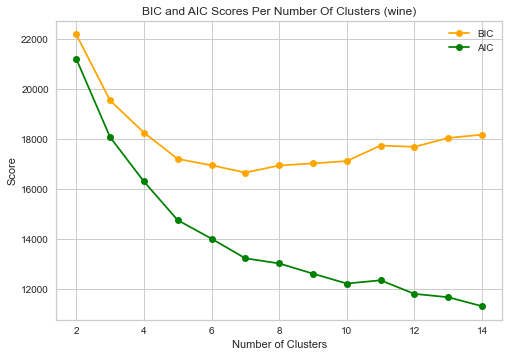

In [26]:
em(X,data_name)

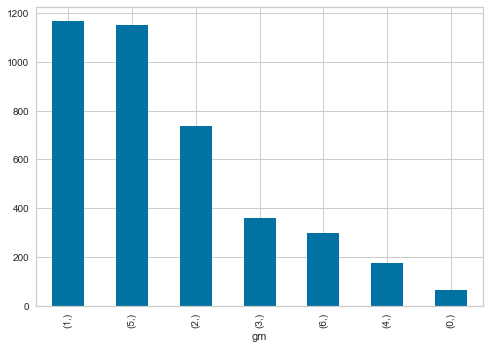

In [27]:
gm_bar(X, 7)

dimension reduction

[ 91.17509556  99.01504616  99.9137241   99.96428936  99.99752614
  99.99837906  99.99904792  99.99957987  99.99997978  99.99999998
 100.        ]


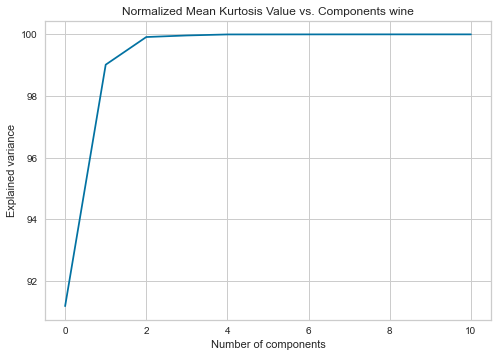

In [28]:
pcaTest(X,data_name)

2


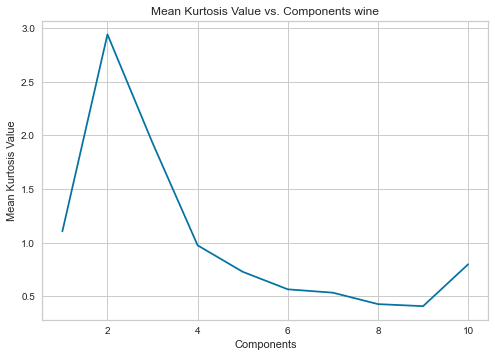

In [29]:
icaTest(X,data_name)

[0.41206512648657834, 0.4100411833495305, 0.4046027224215802, 0.2672228733922739, 0.26251813996104384, 0.2622573259798684, 0.247743307497256, 0.19806670746199517, 0.16927197993505128, 0.039720586161147514, 2.164816213930005e-15]


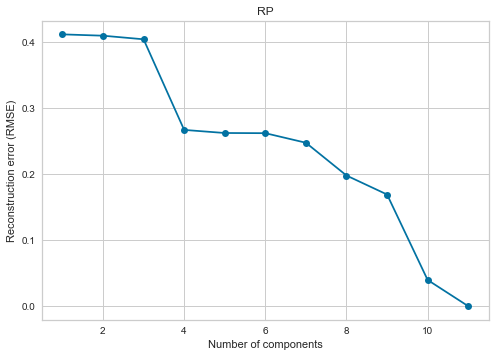

In [30]:
rp(X,data_name)

[0.42735998250432466, 0.40124301211192737, 0.37565515614922157, 0.34990841940149847, 0.32370237701746596, 0.29429189737036004, 0.26182797588129686, 0.22596639086056042, 0.17589754355432835, 0.10327938654968412, 5.358386808953541e-15]


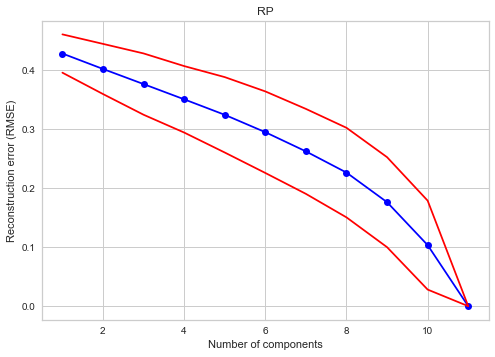

In [31]:
rp2(X,data_name)

[ 82.26732415  94.53334856  97.8773435   99.25165972  99.64980883
 100.        ]


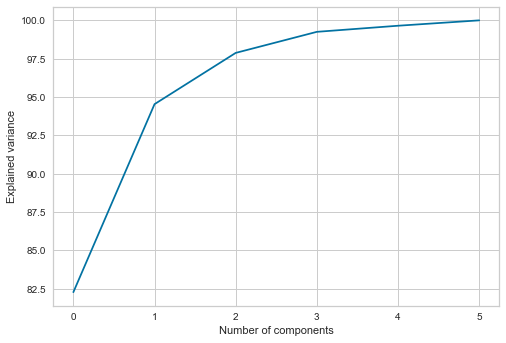

In [32]:
lda(X,Y,data_name)

In [33]:
X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X, Y, test_size=0.2, random_state=234)

In [34]:
X_PCA = PCA(n_components = 2).fit_transform(X)
X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, Y, test_size=0.2, random_state=234)

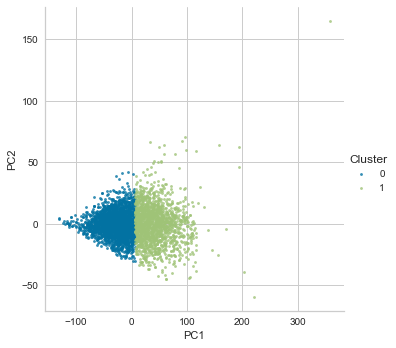

In [35]:
kmeans_pca_2d(X_PCA, 2)

In [36]:
X_ICA = FastICA(n_components = 2).fit_transform(X)
X_ICA_train, X_ICA_test, y_ICA_train, y_ICA_test = train_test_split(X_ICA, Y, test_size=0.2, random_state=234)

In [37]:
X_RP = GaussianRandomProjection(n_components = 4).fit_transform(X)
X_RP_train, X_RP_test, y_RP_train, y_RP_test = train_test_split(X_RP, Y, test_size=0.2, random_state=234)

In [38]:
X_LDP = LinearDiscriminantAnalysis(n_components = 2 ,solver= 'eigen').fit_transform(X,Y.values.ravel())
X_LDP_train, X_LDP_test, y_LDP_train, y_LDP_test = train_test_split(X_LDP, Y, test_size=0.2, random_state=234)

In [39]:
X_PCA

array([[ 34.96744354,   1.31990976],
       [-10.67095068, -18.84618484],
       [-39.96912331,   5.86219393],
       ...,
       [-26.7292516 ,   2.10584059],
       [-30.36418654,  -7.24738328],
       [-41.40591853,  -2.17503076]])

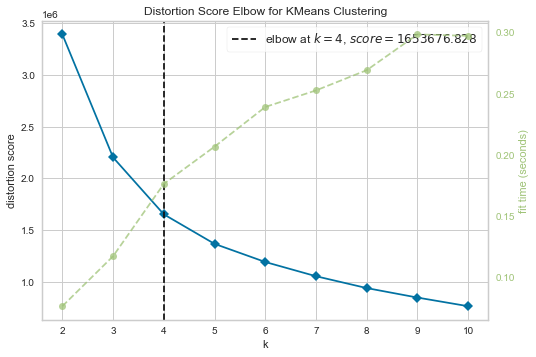

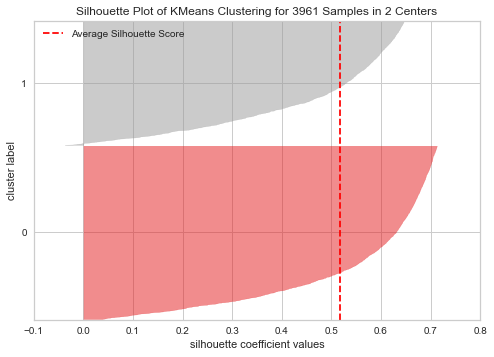

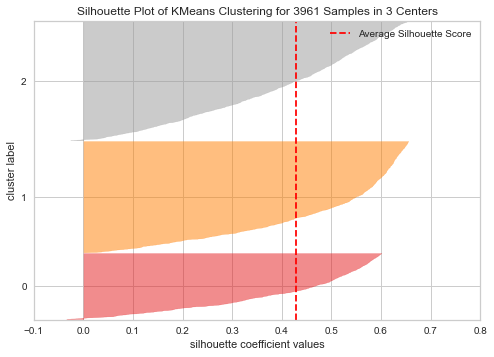

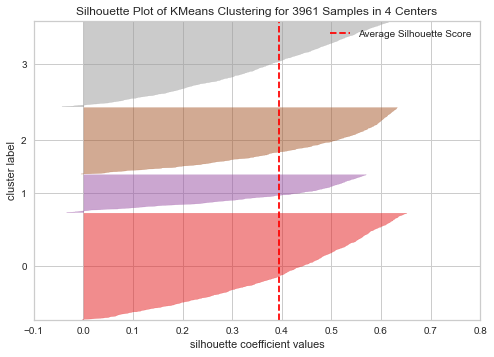

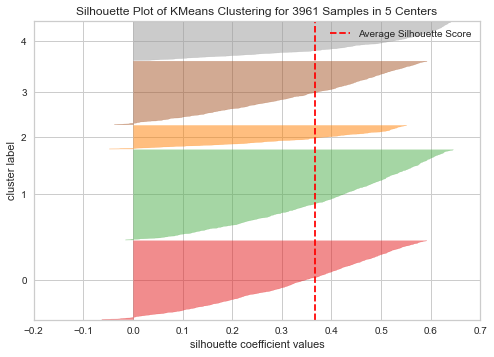

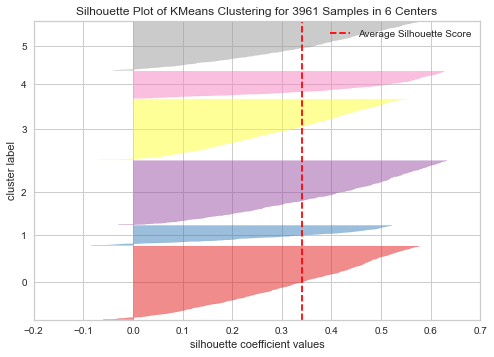

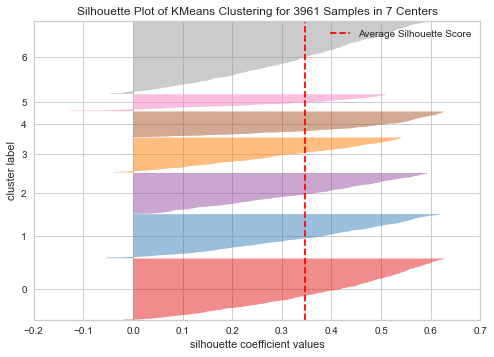

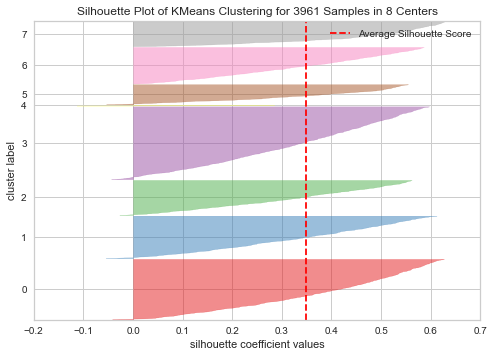

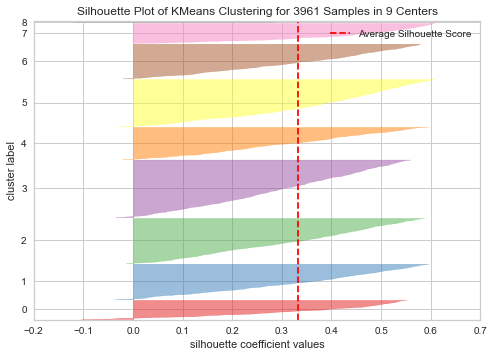

In [40]:
kmeans(X_PCA,data_name)

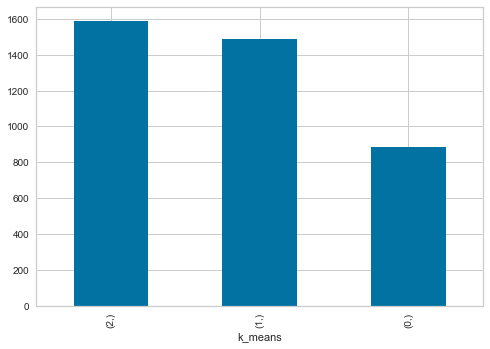

In [41]:
kmeans_bar(X_PCA, 3)

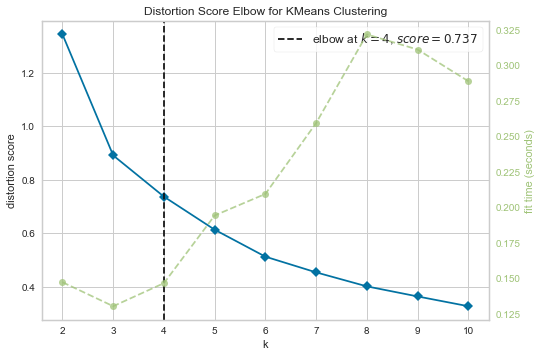

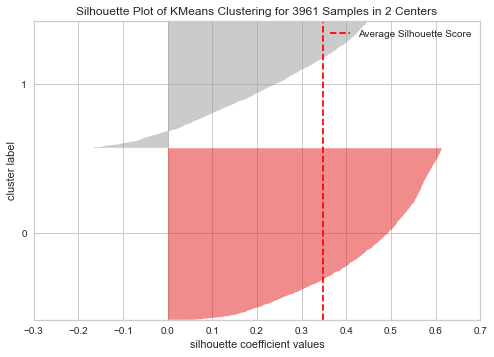

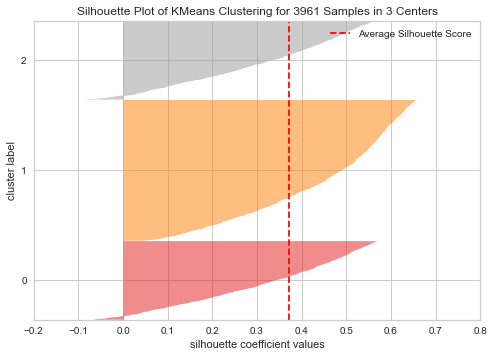

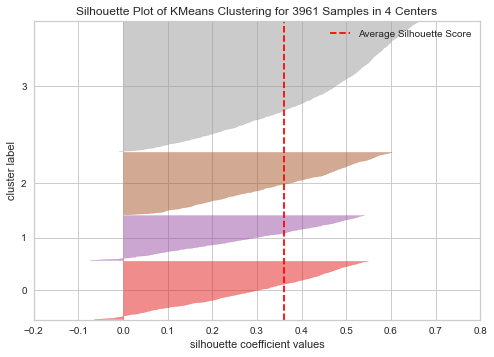

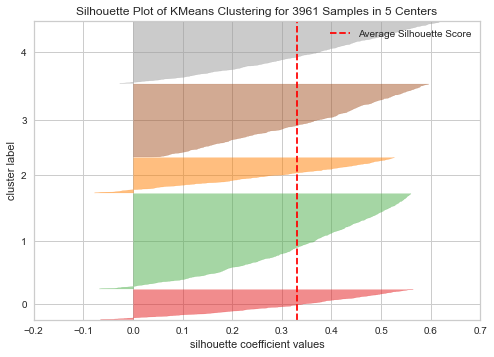

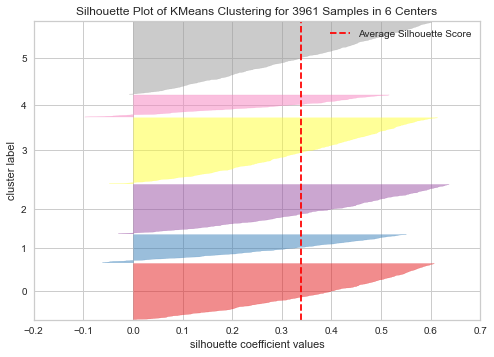

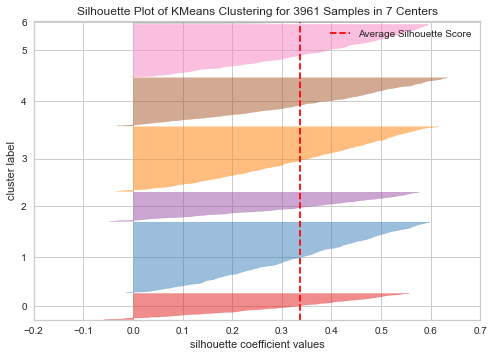

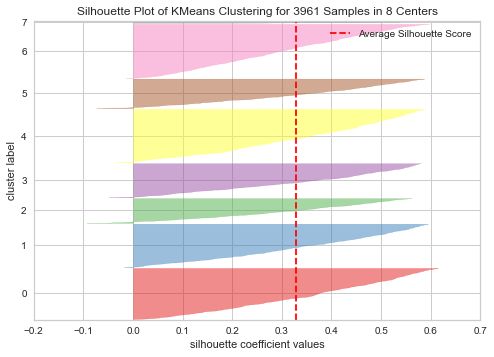

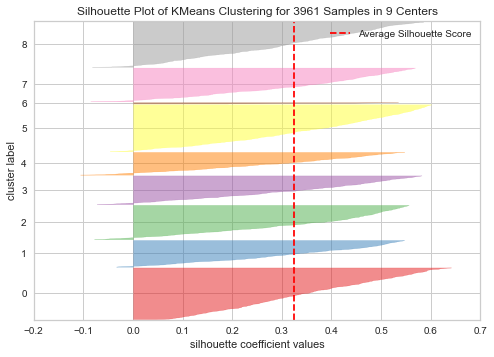

In [42]:
kmeans(X_ICA,data_name)

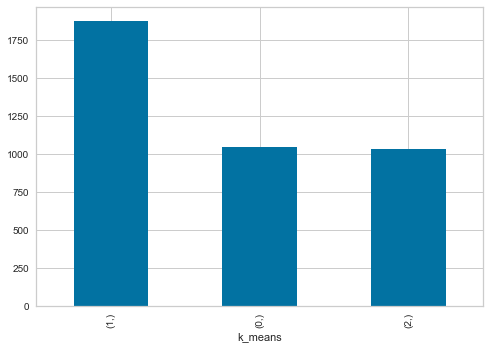

In [43]:
kmeans_bar(X_ICA, 3)

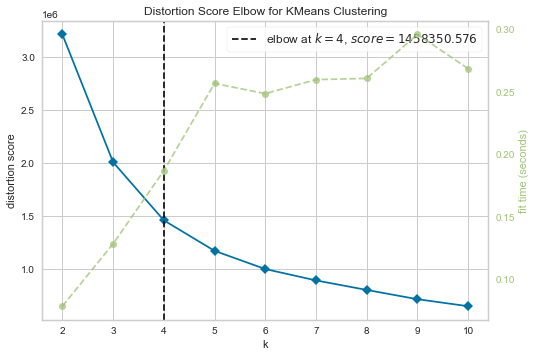

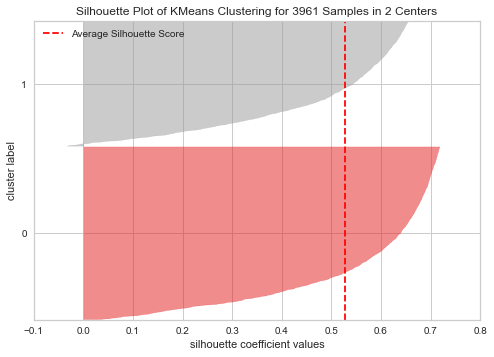

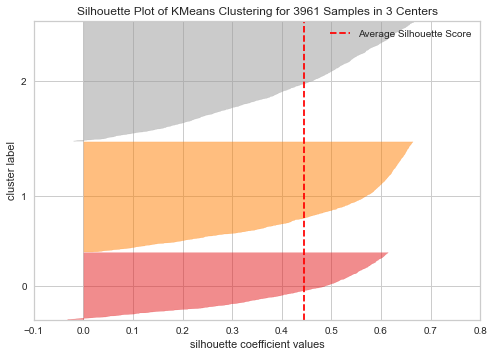

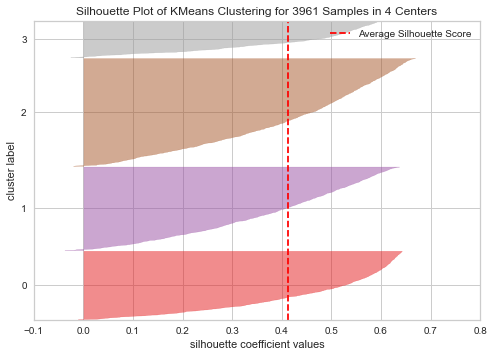

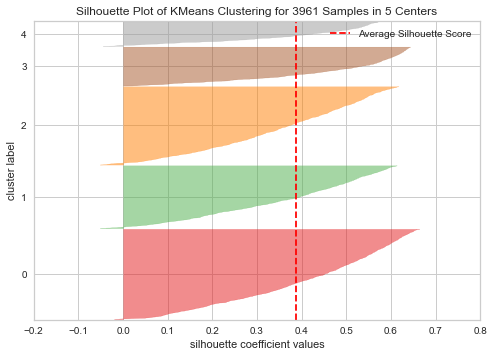

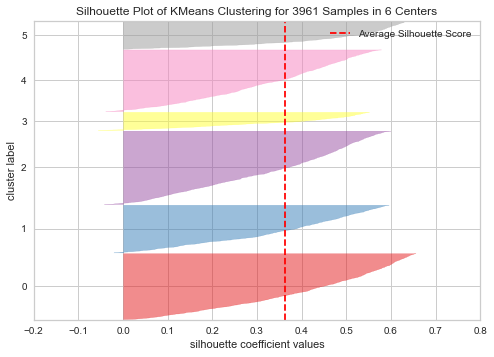

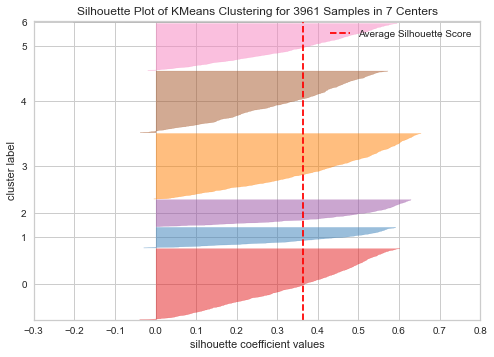

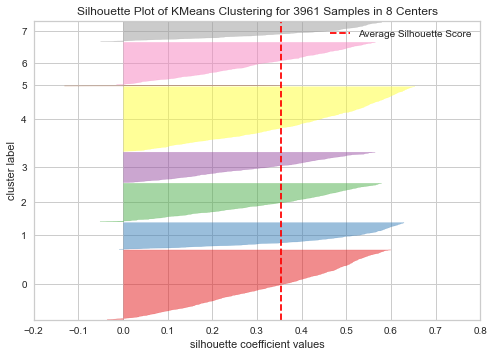

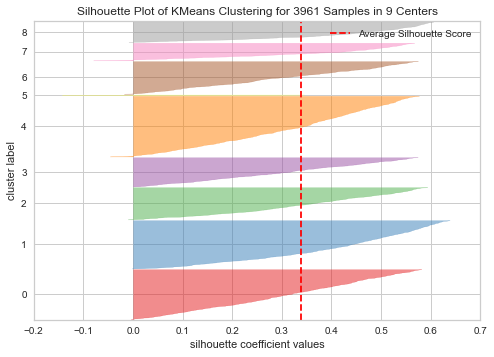

In [44]:
kmeans(X_RP,data_name)

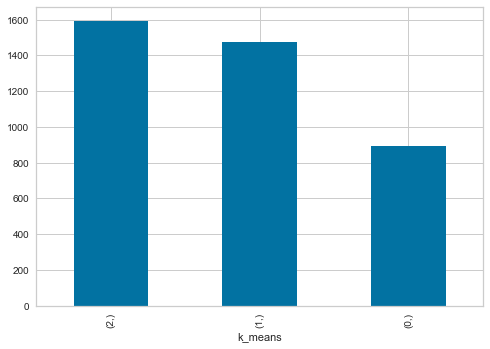

In [45]:
kmeans_bar(X_RP, 3)

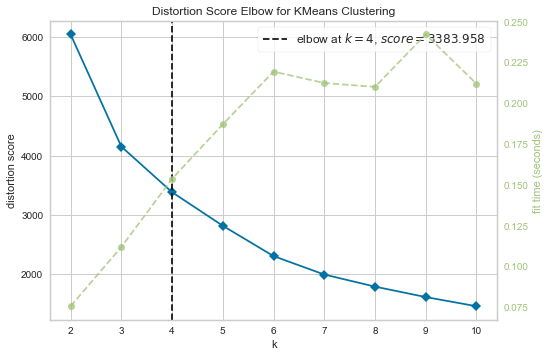

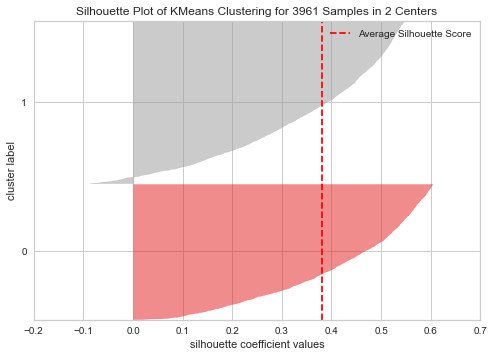

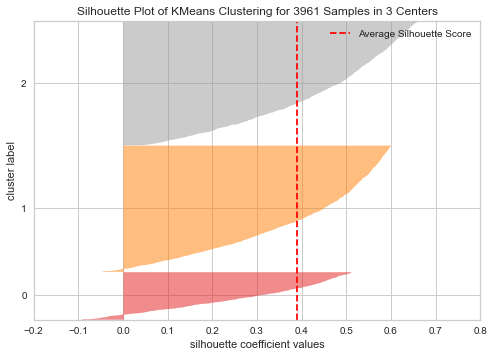

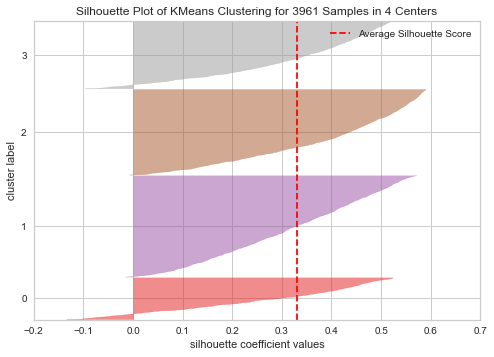

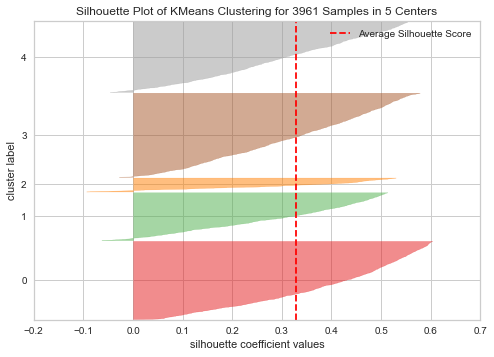

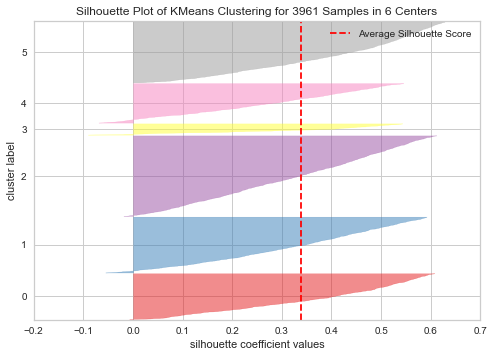

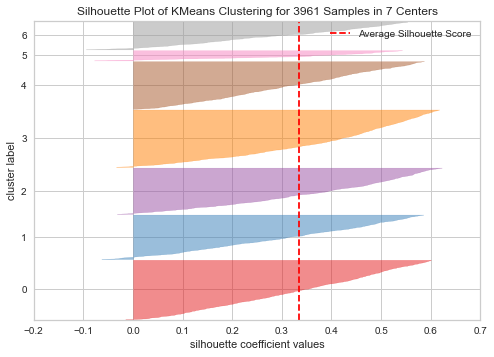

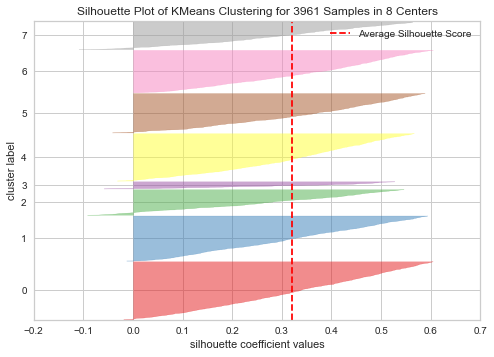

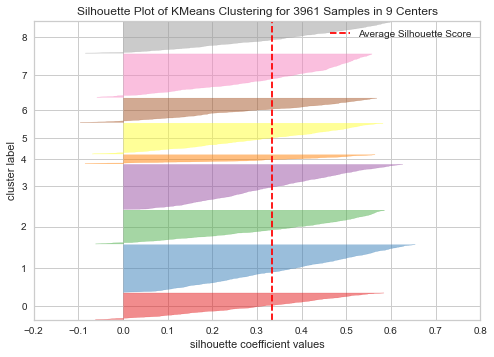

In [46]:
kmeans(X_LDP,data_name)

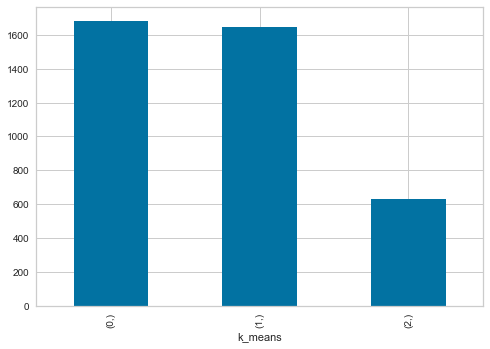

In [47]:
kmeans_bar(X_LDP, 3)

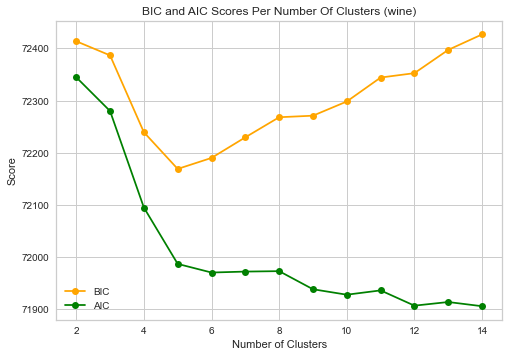

In [48]:
em(X_PCA,data_name)

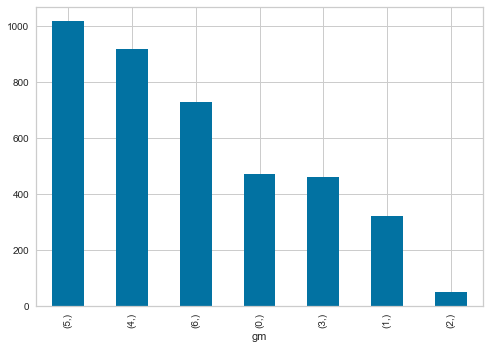

In [49]:
gm_bar(X_PCA, 7)

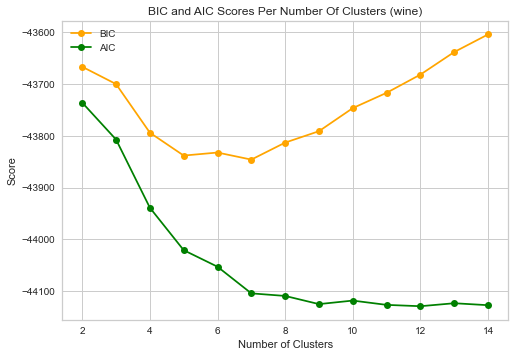

In [50]:
em(X_ICA,data_name)

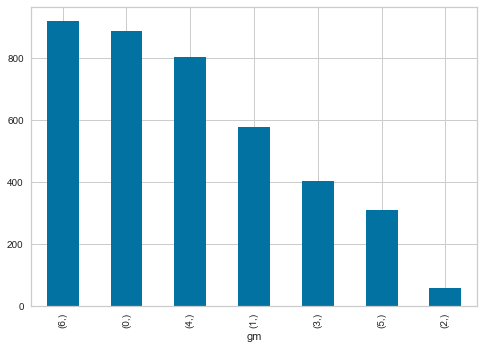

In [51]:
gm_bar(X_ICA, 7)

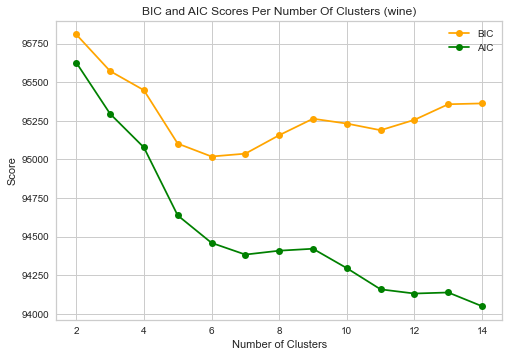

In [52]:
em(X_RP,data_name)

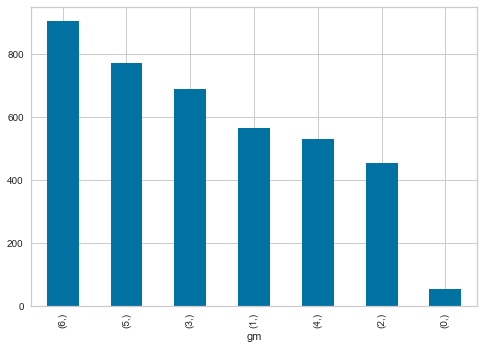

In [53]:
gm_bar(X_RP, 7)

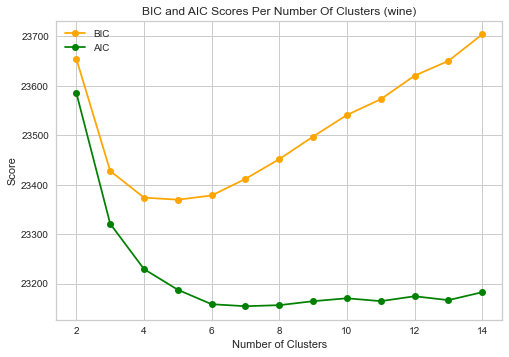

In [54]:
em(X_LDP,data_name)

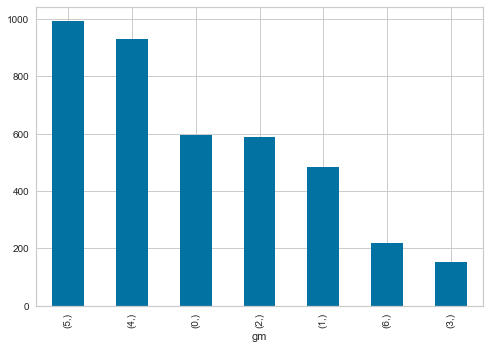

In [55]:
gm_bar(X_LDP, 7)

NN

In [56]:
base_train_score, base_test_score, base_train_time, base_test_time = NN(X_base_train, X_base_test, y_base_train.values.ravel(), y_base_test.values.ravel())

Training Time: 2015.27685546875
Testing Time: 2.35400390625
Training Time: 1368.368896484375
Testing Time: 2.460205078125
Training Time: 2667.779052734375
Testing Time: 2.083984375
Training Time: 2402.033935546875
Testing Time: 2.075927734375
Training Time: 1459.60791015625
Testing Time: 2.0107421875
Training Time: 1958.740234375
Testing Time: 2.020751953125
Training Time: 1039.27880859375
Testing Time: 2.4267578125
Training Time: 1209.570068359375
Testing Time: 2.1171875
Training Time: 1270.510009765625
Testing Time: 2.06982421875
Training Time: 1488.844970703125
Testing Time: 2.07421875


In [57]:
pca_train_score, pca_test_score, pca_train_time, pca_test_time = NN(X_PCA_train, X_PCA_test, y_PCA_train.values.ravel(), y_PCA_test.values.ravel())

Training Time: 1709.229736328125
Testing Time: 1.02294921875
Training Time: 1485.70703125
Testing Time: 0.88818359375
Training Time: 2023.00927734375
Testing Time: 0.872314453125
Training Time: 1462.302001953125
Testing Time: 0.8818359375
Training Time: 1643.76611328125
Testing Time: 0.8740234375
Training Time: 1586.97119140625
Testing Time: 1.02099609375
Training Time: 1594.642822265625
Testing Time: 1.1220703125
Training Time: 1507.096923828125
Testing Time: 1.162109375
Training Time: 879.469970703125
Testing Time: 1.15087890625
Training Time: 1065.9951171875
Testing Time: 1.173095703125


In [58]:
ica_train_score, ica_test_score, ica_train_time, ica_test_time = NN(X_ICA_train, X_ICA_test, y_ICA_train.values.ravel(), y_ICA_test.values.ravel())

Training Time: 587.39892578125
Testing Time: 0.861328125
Training Time: 783.47021484375
Testing Time: 0.975830078125
Training Time: 2804.64501953125
Testing Time: 0.887939453125
Training Time: 2396.69091796875
Testing Time: 0.9609375
Training Time: 2864.1240234375
Testing Time: 1.0439453125
Training Time: 2294.083984375
Testing Time: 0.972900390625
Training Time: 1600.519775390625
Testing Time: 0.968994140625
Training Time: 1968.85009765625
Testing Time: 1.15185546875
Training Time: 1930.8837890625
Testing Time: 1.135009765625
Training Time: 2509.063232421875
Testing Time: 1.01416015625


In [59]:
rp_train_score, rp_test_score, rp_train_time, rp_test_time = NN(X_RP_train, X_RP_test, y_RP_train.values.ravel(), y_RP_test.values.ravel())

Training Time: 1173.239013671875
Testing Time: 0.796875
Training Time: 1562.711669921875
Testing Time: 0.80615234375
Training Time: 1374.742919921875
Testing Time: 0.8173828125
Training Time: 1231.68115234375
Testing Time: 0.90185546875
Training Time: 745.34375
Testing Time: 1.07275390625
Training Time: 597.54248046875
Testing Time: 1.01611328125
Training Time: 1028.2099609375
Testing Time: 1.184814453125
Training Time: 742.238037109375
Testing Time: 1.083740234375
Training Time: 755.9580078125
Testing Time: 1.074951171875
Training Time: 774.6240234375
Testing Time: 0.99609375


In [60]:
ldp_train_score, ldp_test_score, ldp_train_time, ldp_test_time = NN(X_LDP_train, X_LDP_test, y_LDP_train.values.ravel(), y_LDP_test.values.ravel())

Training Time: 241.37890625
Testing Time: 1.051025390625
Training Time: 224.403076171875
Testing Time: 0.816650390625
Training Time: 154.432861328125
Testing Time: 0.864013671875
Training Time: 350.31982421875
Testing Time: 0.8623046875
Training Time: 314.947265625
Testing Time: 1.224853515625
Training Time: 403.048095703125
Testing Time: 0.971923828125
Training Time: 243.10986328125
Testing Time: 1.145263671875
Training Time: 319.348876953125
Testing Time: 1.36279296875
Training Time: 331.233154296875
Testing Time: 1.15673828125
Training Time: 207.2138671875
Testing Time: 1.4990234375


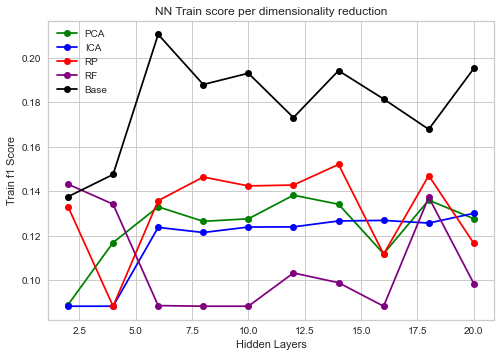

In [61]:
plot_nn("NN Train score per dimensionality reduction","Train f1 Score",base_train_score,pca_train_score,ica_train_score,rp_train_score,ldp_train_score)

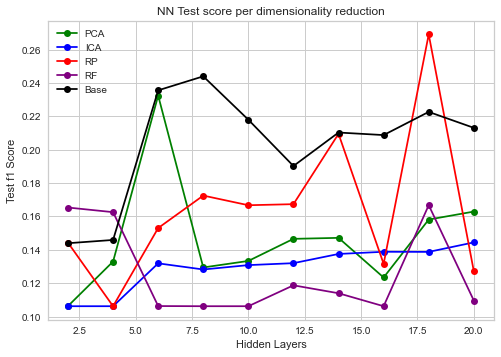

In [62]:
plot_nn("NN Test score per dimensionality reduction","Test f1 Score",base_test_score,pca_test_score,ica_test_score,rp_test_score,ldp_test_score)

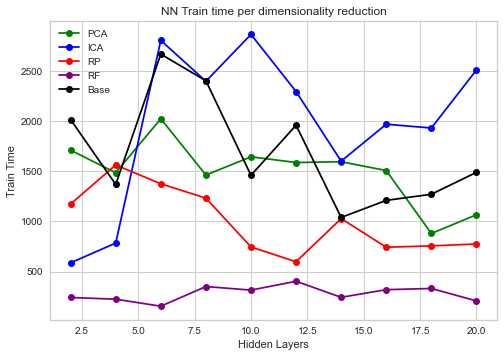

In [63]:
plot_nn("NN Train time per dimensionality reduction","Train Time",base_train_time,pca_train_time,ica_train_time,rp_train_time,ldp_train_time)

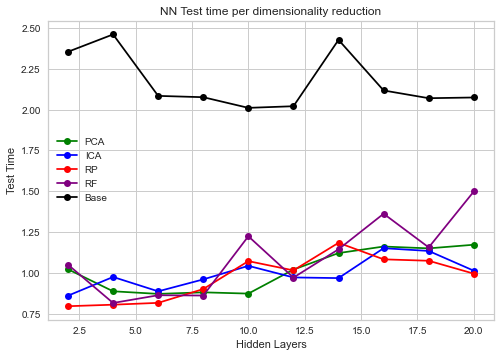

In [64]:
plot_nn("NN Test time per dimensionality reduction","Test Time",base_test_time,pca_test_time,ica_test_time,rp_test_time,ldp_test_time)

Add clusters as new feature

In [65]:
k_means_clustering = KMeans(n_clusters=3, random_state=234).fit(X)

In [66]:
k_means_clustering.predict(X)
kmeans_labels = pd.DataFrame(data = k_means_clustering.predict(X), columns=['k_means'])

<AxesSubplot:xlabel='k_means'>

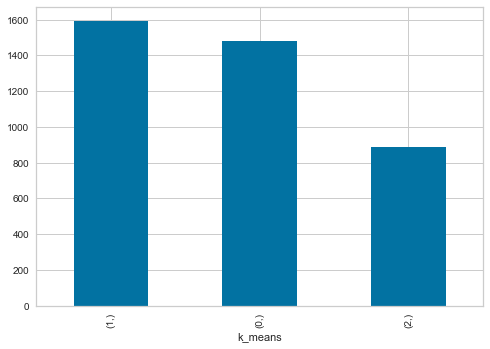

In [67]:
kmeans_labels.value_counts().plot(kind='bar')

In [68]:
X_KMeans = np.append(X, kmeans_labels, axis=1)
X_KMeans_train, X_KMeans_test, y_KMeans_train, y_KMeans_test = train_test_split(X_KMeans, Y, test_size=0.2, random_state=42)

In [69]:
kmeans_train_score, kmeans_test_score, kmeans_train_time, kmeans_test_time = NN(X_KMeans_train, X_KMeans_test, y_KMeans_train.values.ravel(), y_KMeans_test.values.ravel())

Training Time: 4502.8701171875
Testing Time: 0.8291015625
Training Time: 2756.540771484375
Testing Time: 0.9169921875
Training Time: 1336.39404296875
Testing Time: 1.288818359375
Training Time: 3755.885009765625
Testing Time: 0.990478515625
Training Time: 1354.087890625
Testing Time: 1.14697265625
Training Time: 2701.4462890625
Testing Time: 1.39404296875
Training Time: 1172.72119140625
Testing Time: 1.150146484375
Training Time: 1041.252197265625
Testing Time: 1.0517578125
Training Time: 629.92822265625
Testing Time: 1.1689453125
Training Time: 1003.90576171875
Testing Time: 1.033935546875


In [70]:
gm = GaussianMixture(n_components=7, covariance_type='full')
gm.fit(X)

GaussianMixture(n_components=7)

In [71]:
gm.predict(X)
gm_labels = pd.DataFrame(data = gm.predict(X), columns=['gm'])

<AxesSubplot:xlabel='gm'>

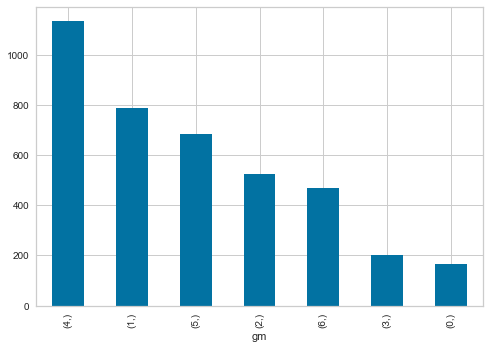

In [72]:
gm_labels.value_counts().plot(kind='bar')

In [73]:
X_GMM = np.append(X, gm_labels, axis=1)
X_GMM_train, X_GMM_test, y_GMM_train, y_GMM_test = train_test_split(X_GMM, Y, test_size=0.2, random_state=42)

In [74]:
gm_train_score, gm_test_score, gm_train_time, gm_test_time = NN(X_GMM_train, X_GMM_test, y_GMM_train.values.ravel(), y_GMM_test.values.ravel())

Training Time: 4034.506103515625
Testing Time: 0.835205078125
Training Time: 3471.381591796875
Testing Time: 0.8388671875
Training Time: 2251.820068359375
Testing Time: 0.8349609375
Training Time: 2975.54296875
Testing Time: 1.039794921875
Training Time: 1353.771240234375
Testing Time: 1.35791015625
Training Time: 2343.49169921875
Testing Time: 1.0419921875
Training Time: 1353.7060546875
Testing Time: 1.09912109375
Training Time: 908.251220703125
Testing Time: 1.10888671875
Training Time: 647.405029296875
Testing Time: 1.1689453125
Training Time: 1152.68408203125
Testing Time: 1.126220703125


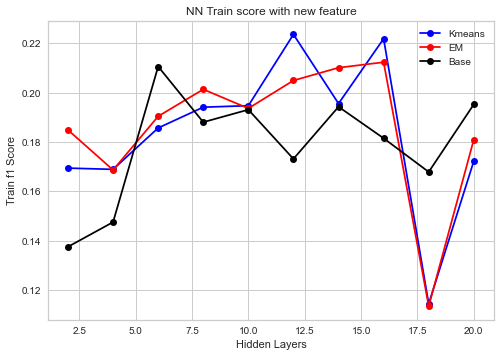

In [75]:
plot_nn_newf("NN Train score with new feature","Train f1 Score",base_train_score,kmeans_train_score,gm_train_score)

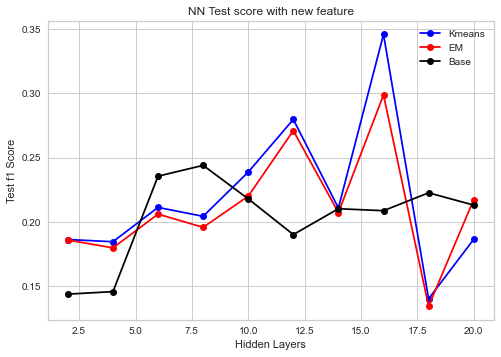

In [76]:
plot_nn_newf("NN Test score with new feature","Test f1 Score",base_test_score,kmeans_test_score,gm_test_score)

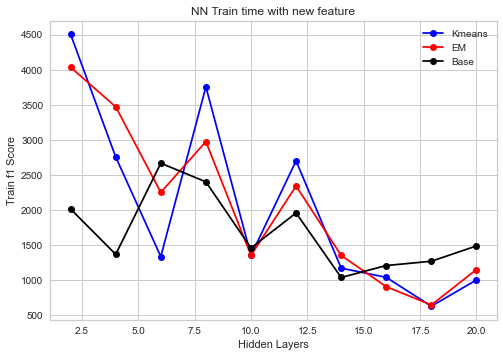

In [77]:
plot_nn_newf("NN Train time with new feature","Train f1 Score",base_train_time,kmeans_train_time,gm_train_time)

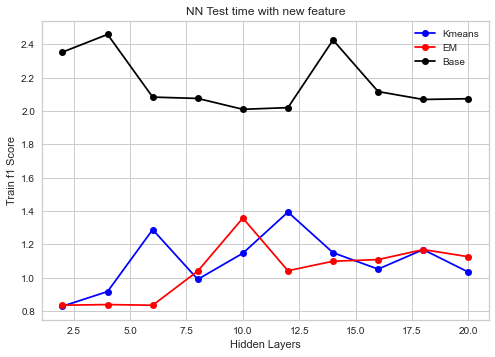

In [78]:
plot_nn_newf("NN Test time with new feature","Train f1 Score",base_test_time,kmeans_test_time,gm_test_time)

## Divorce

In [79]:
X,Y,data_name = divorce()

<AxesSubplot:xlabel='Class'>

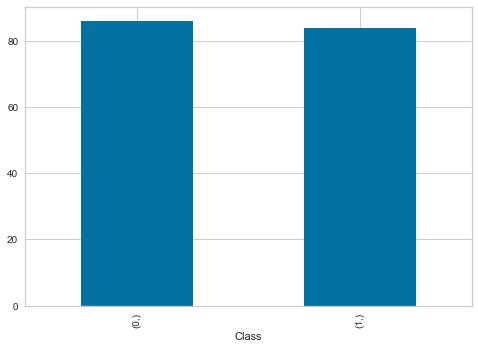

In [80]:
Y.value_counts().plot(kind='bar')

<AxesSubplot:>

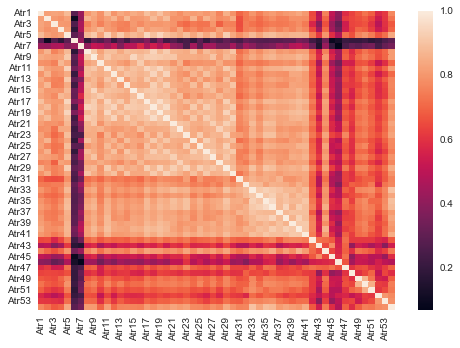

In [81]:
sns.heatmap(X.corr())

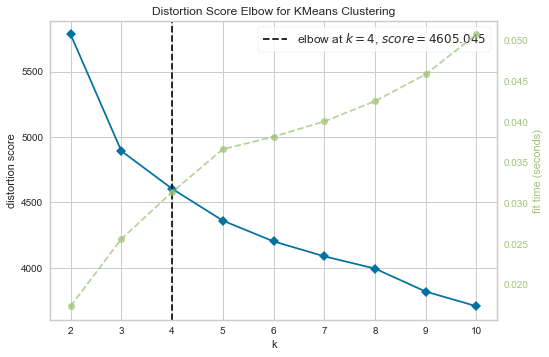

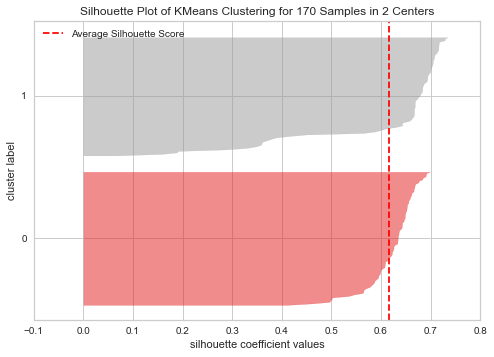

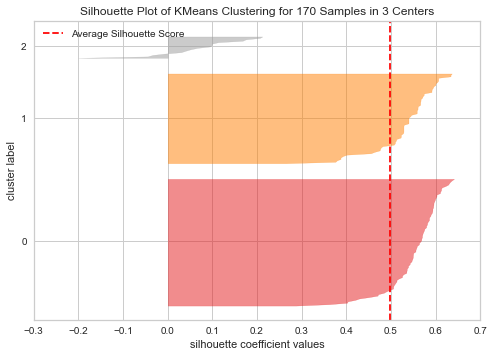

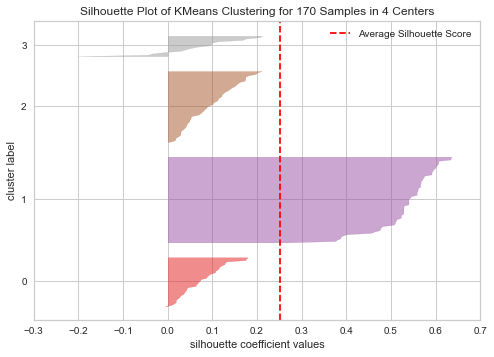

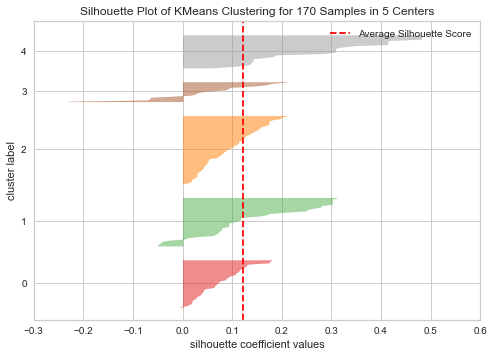

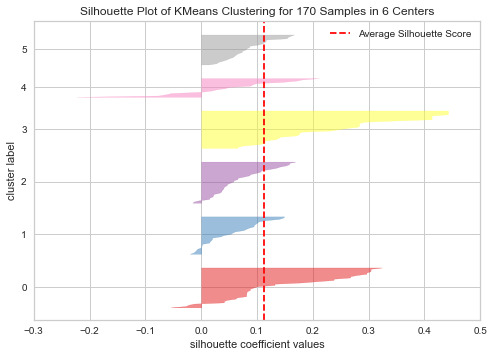

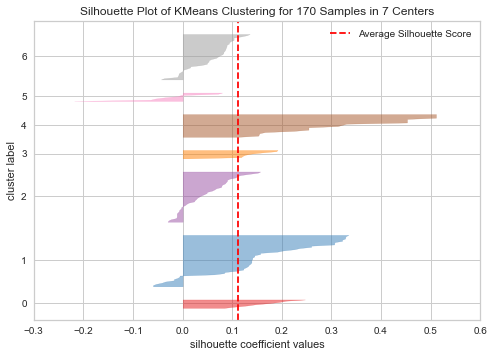

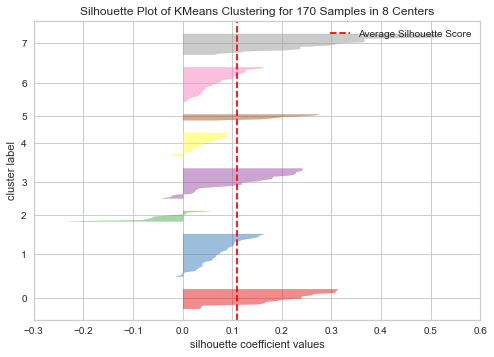

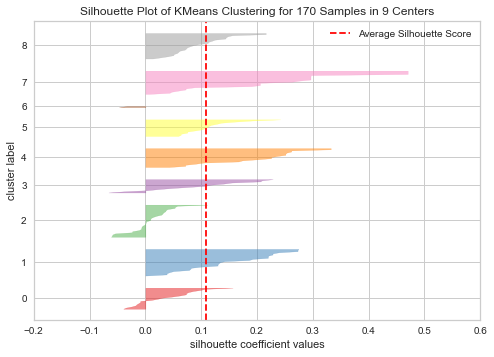

In [82]:
kmeans(X,data_name)

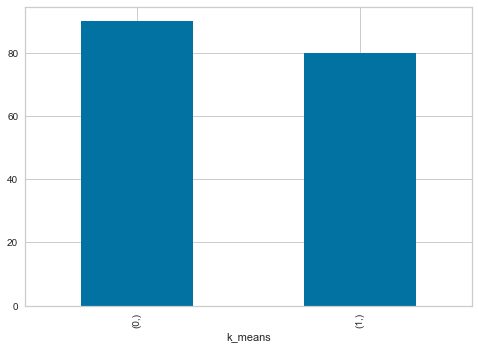

In [83]:
kmeans_bar(X, 2)

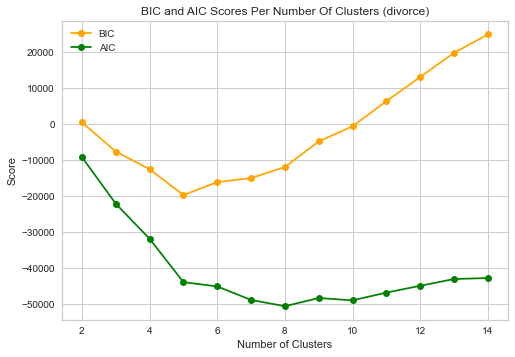

In [84]:
em(X,data_name)

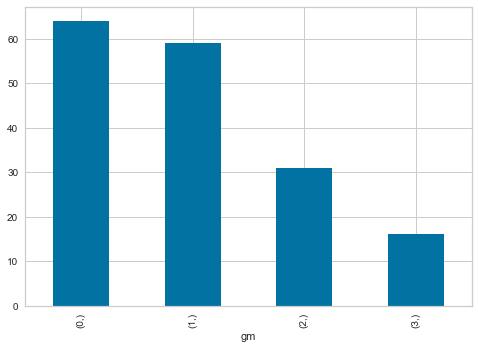

In [85]:
gm_bar(X, 4)

reduction

[ 77.22180992  80.74831461  83.30231009  84.78624776  86.11455612
  87.29942141  88.41983013  89.36419168  90.25868058  91.11632325
  91.86177337  92.55939136  93.17640657  93.72015537  94.22951693
  94.69424632  95.15060958  95.53905693  95.92206109  96.25254012
  96.54870243  96.82418376  97.08074342  97.32309984  97.53515715
  97.7364715   97.93445173  98.11964356  98.2919476   98.45416411
  98.5902166   98.71899207  98.83505099  98.94694933  99.05382958
  99.15361199  99.24630924  99.33174192  99.41353816  99.48743308
  99.5560524   99.61226574  99.66365702  99.71376518  99.75952746
  99.79938446  99.83594633  99.86699841  99.89609528  99.92284195
  99.94547457  99.96647804  99.98527296 100.        ]


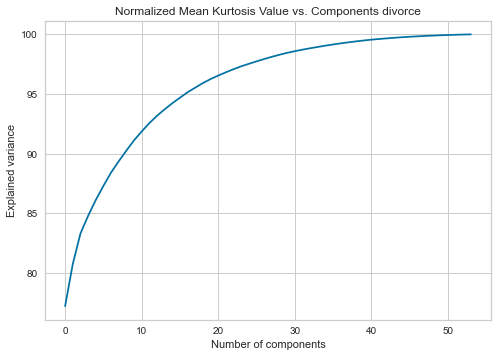

In [86]:
pcaTest(X,data_name)

/usr/local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/usr/local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/usr/local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
/usr/local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge

52


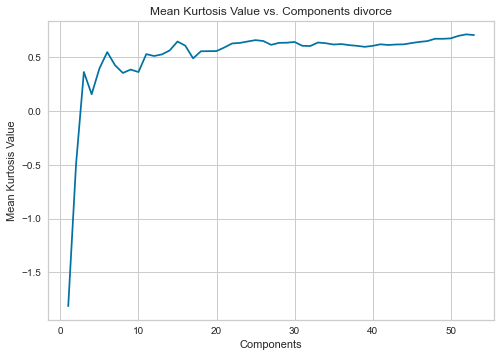

In [87]:
icaTest(X,data_name)

[0.02372200174233926, 0.023040564302396607, 0.02292484626389116, 0.022799482365138183, 0.022754545821116037, 0.022706123021606083, 0.022505928798996502, 0.022254126710989523, 0.021905482988618448, 0.021863349506193275, 0.021741889516352485, 0.021610829653658247, 0.02156705738677702, 0.021500770590963687, 0.0213154997761042, 0.020949818647445925, 0.02088146596746583, 0.020847695590860846, 0.020621003168636687, 0.020513122962846526, 0.020468445406342513, 0.020166840003398353, 0.019973827810746952, 0.0197462925099445, 0.019642355613882518, 0.01901083157889757, 0.018973735312508514, 0.01893796255870701, 0.018853060048963782, 0.017966936958716484, 0.01793321037538292, 0.01779056950192955, 0.017504462900090487, 0.01682842998977024, 0.016698027363576926, 0.01637551029393671, 0.016199114232652766, 0.015927037322810745, 0.015711689898945665, 0.015432887642860724, 0.015360990903287283, 0.015263017016124323, 0.015219894114786707, 0.015139830770111908, 0.014862176528893774, 0.014500636671022034, 0

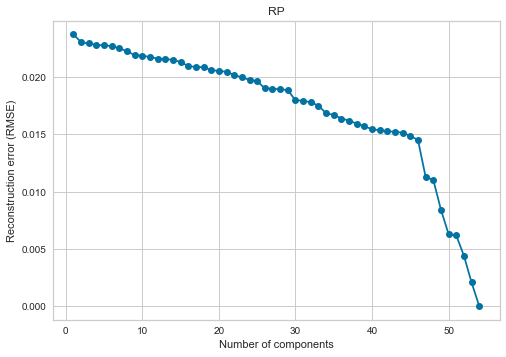

In [88]:
rp(X,data_name)

[0.0237111888198817, 0.02348883474469957, 0.023275573800205444, 0.023029652217809542, 0.022785236004272343, 0.022597133656571195, 0.02236899850500347, 0.02215393085887826, 0.02190330187798836, 0.021689221036718557, 0.021478955759596324, 0.021264311953542333, 0.020994498604001745, 0.02070972416517894, 0.02039223372258526, 0.020140920546447724, 0.01983629298488197, 0.019541875975408338, 0.019226732682218455, 0.018927577084555548, 0.018679335821349483, 0.018405184645825797, 0.018090723945880523, 0.017792372709728225, 0.017444376155637074, 0.017082494234412087, 0.016686310946312174, 0.01642390812586224, 0.016110514396521523, 0.015744786961899977, 0.015401638455728648, 0.014983687266027203, 0.014690077071503637, 0.014408929011205811, 0.01397214130703157, 0.013590121244682202, 0.01318485058725828, 0.0128313329249553, 0.012421713309952667, 0.011978379402897832, 0.011489311237128489, 0.010920166563654807, 0.010426403686867893, 0.009894666457436453, 0.00932250995415499, 0.008789798747100824, 0.

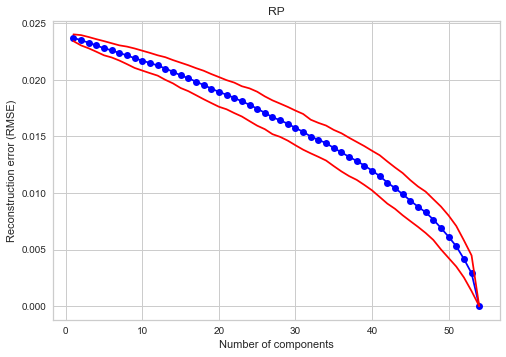

In [89]:
rp2(X,data_name)

[100.]


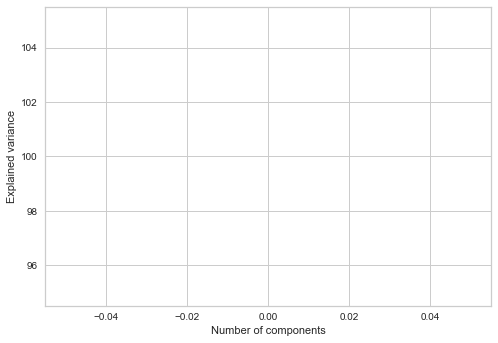

In [90]:
lda(X,Y,data_name)

In [91]:
X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X, Y, test_size=0.2, random_state=234)

In [92]:
X_PCA = PCA(n_components = 17).fit_transform(X)
X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, Y, test_size=0.2, random_state=234)

In [93]:
X_ICA = FastICA(n_components = 17).fit_transform(X)
X_ICA_train, X_ICA_test, y_ICA_train, y_ICA_test = train_test_split(X_ICA, Y, test_size=0.2, random_state=234)

In [94]:
X_RP = GaussianRandomProjection(n_components = 4).fit_transform(X)
X_RP_train, X_RP_test, y_RP_train, y_RP_test = train_test_split(X_RP, Y, test_size=0.2, random_state=234)

In [95]:
X_LDP = LinearDiscriminantAnalysis(n_components = 1 ,solver= 'eigen').fit_transform(X,Y.values.ravel())
X_LDP_train, X_LDP_test, y_LDP_train, y_LDP_test = train_test_split(X_LDP, Y, test_size=0.2, random_state=234)

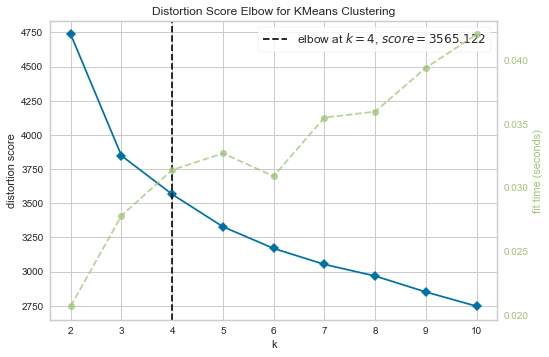

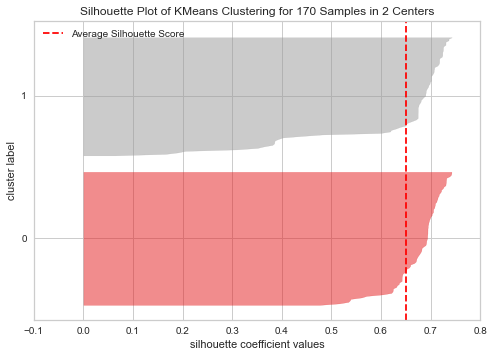

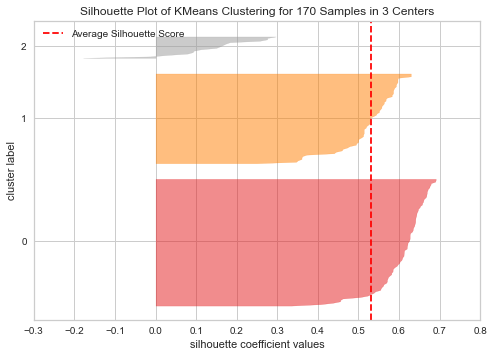

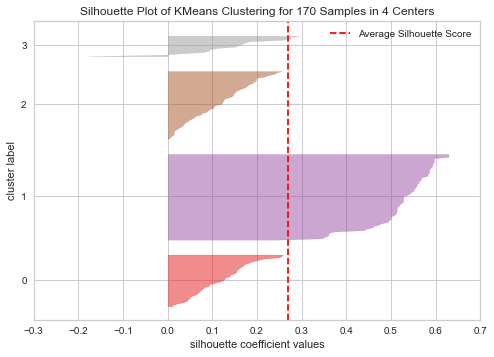

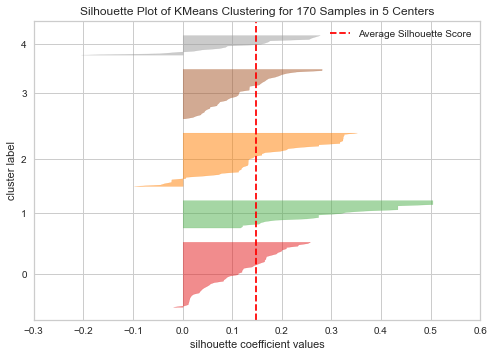

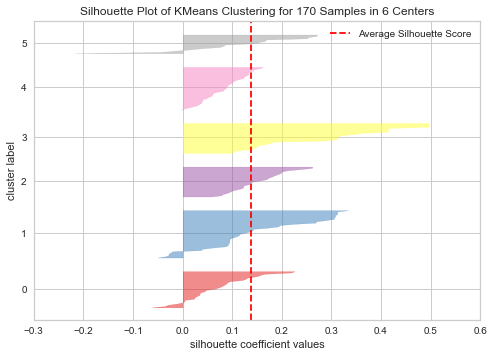

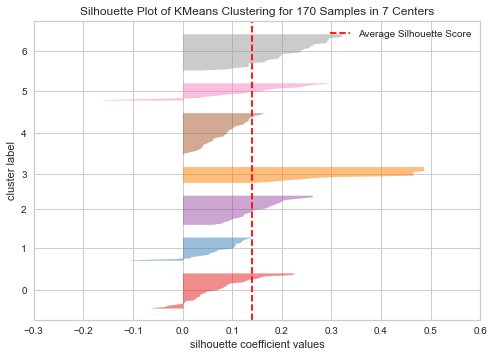

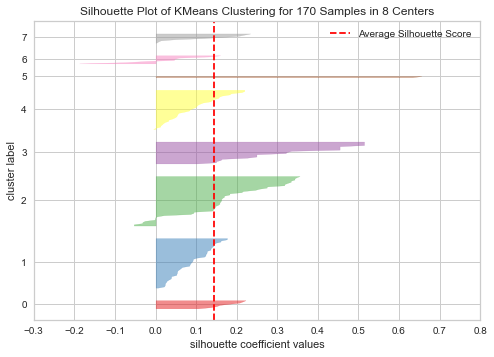

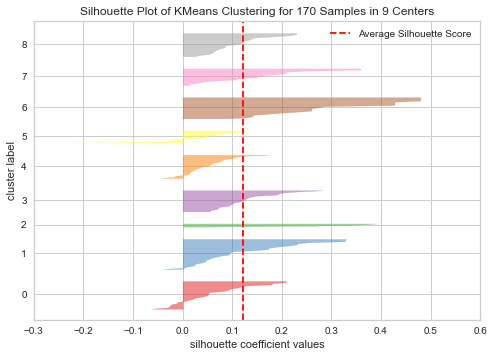

In [96]:
kmeans(X_PCA,data_name)

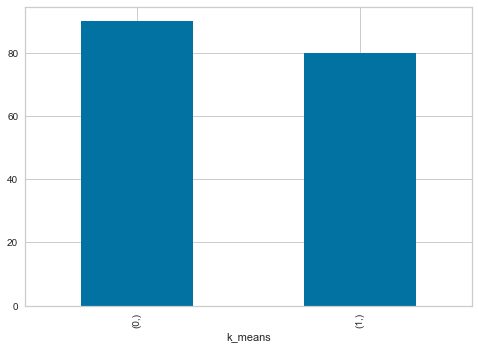

In [97]:
kmeans_bar(X_PCA, 2)

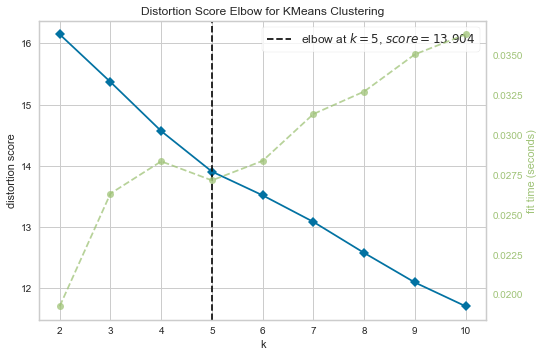

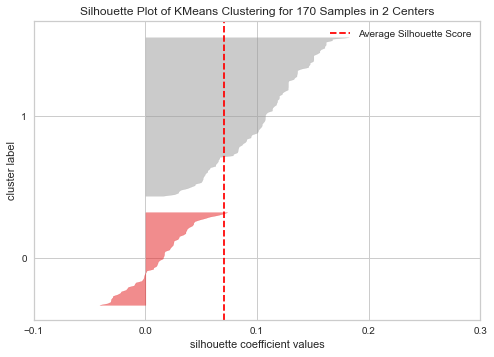

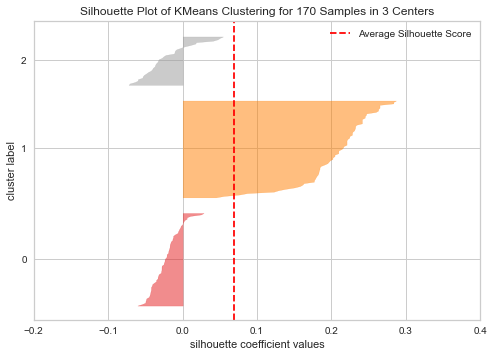

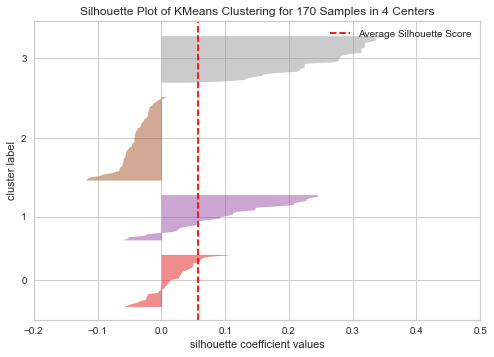

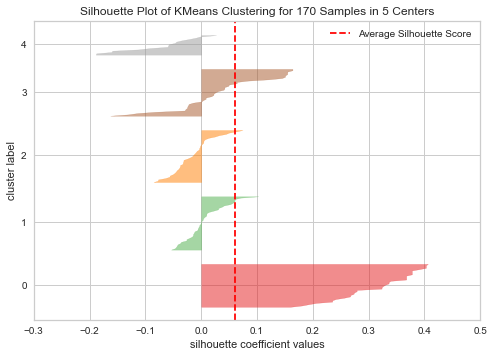

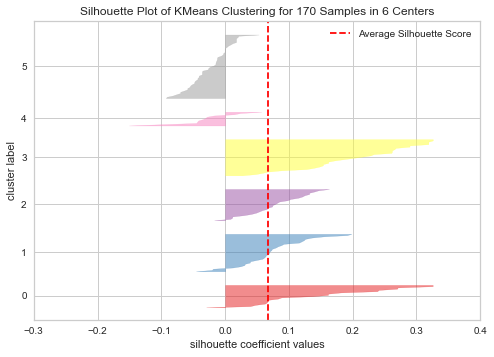

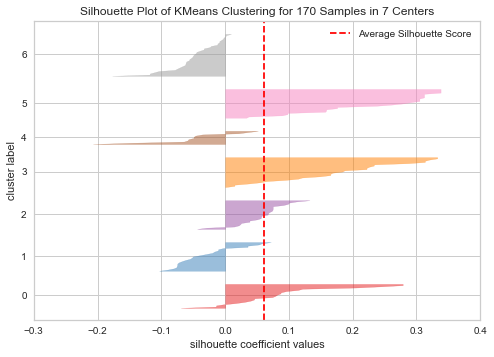

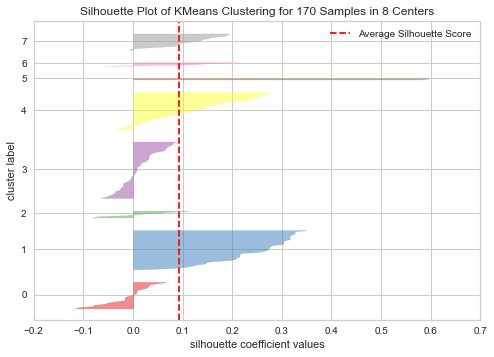

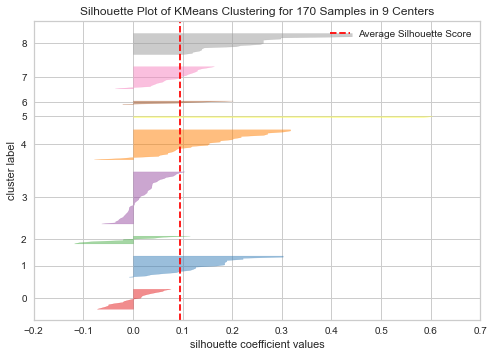

In [98]:
kmeans(X_ICA,data_name)

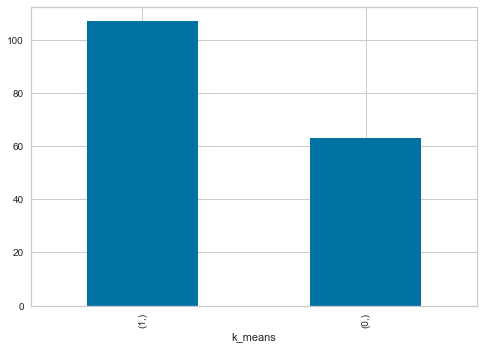

In [99]:
kmeans_bar(X_ICA, 2)

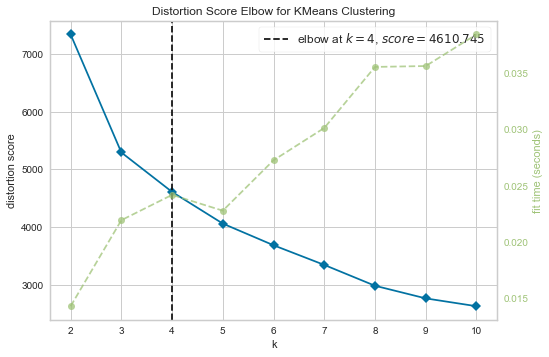

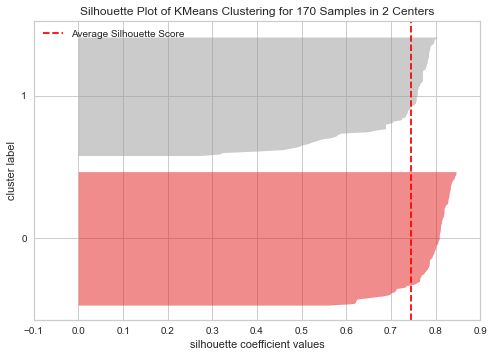

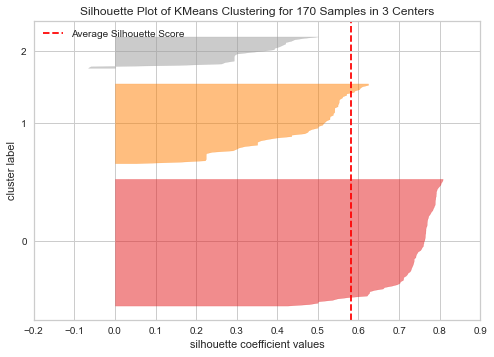

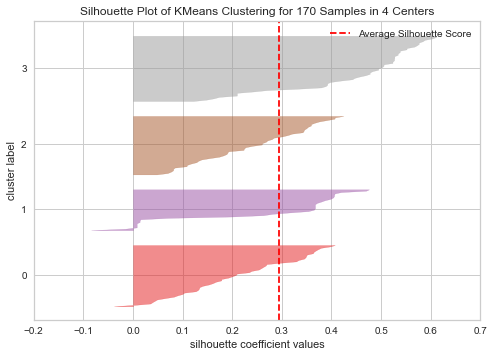

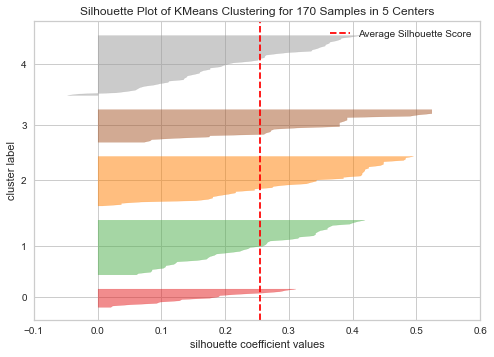

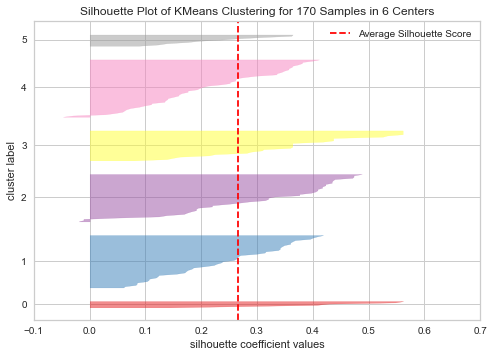

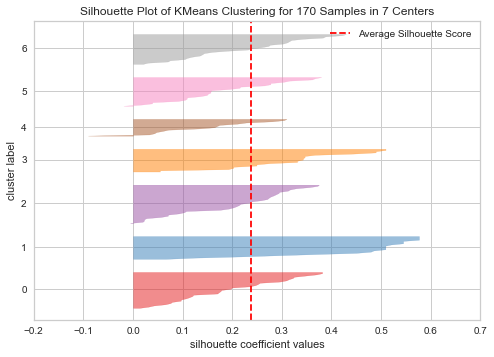

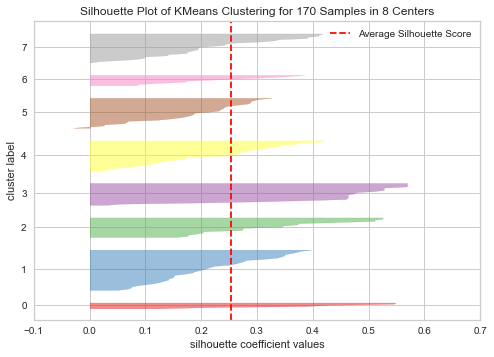

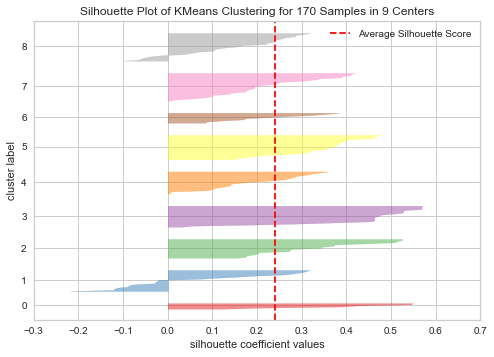

In [100]:
kmeans(X_RP,data_name)

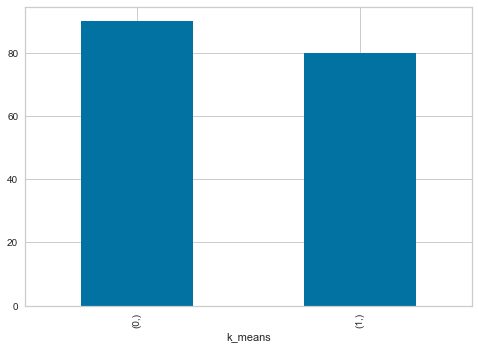

In [101]:
kmeans_bar(X_RP, 2)

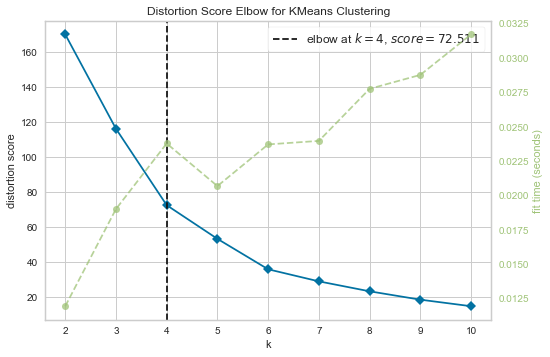

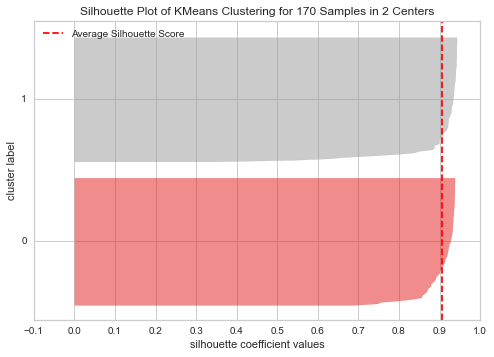

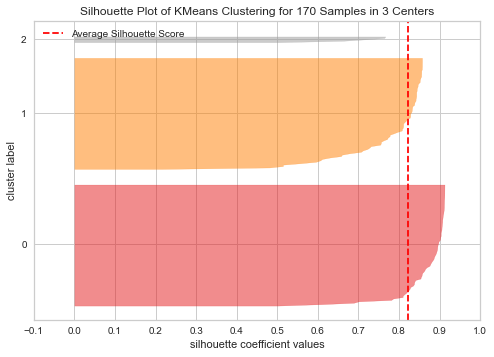

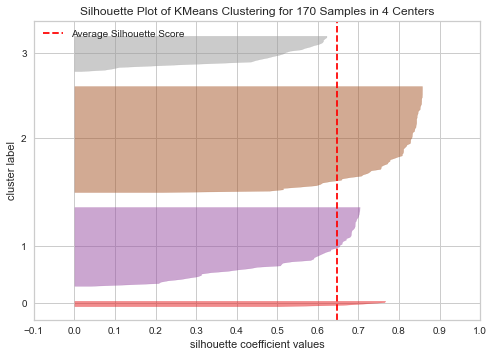

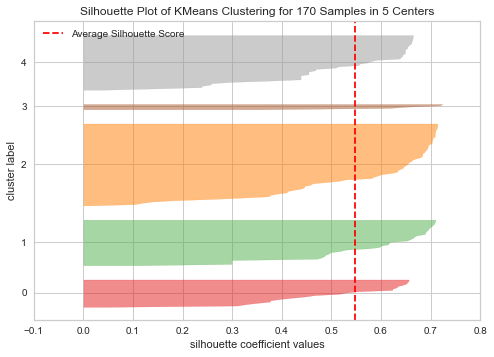

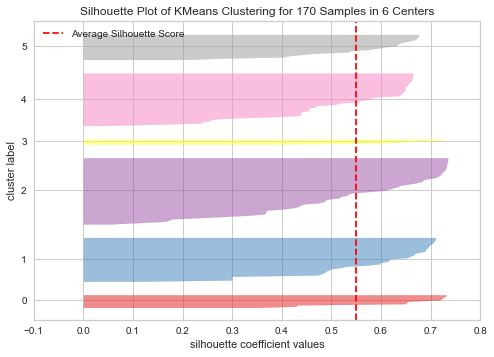

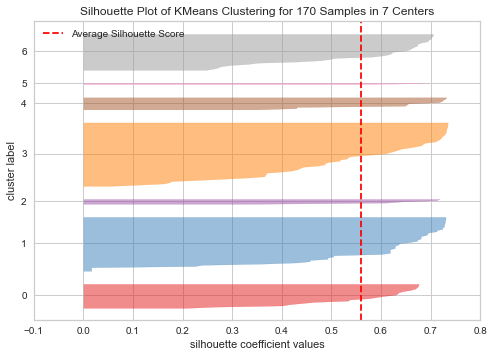

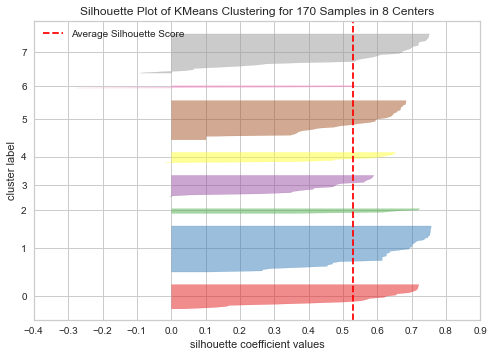

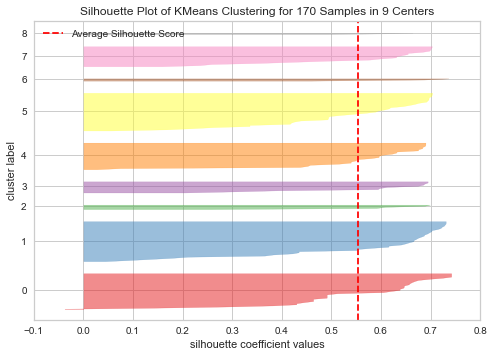

In [102]:
kmeans(X_LDP,data_name)

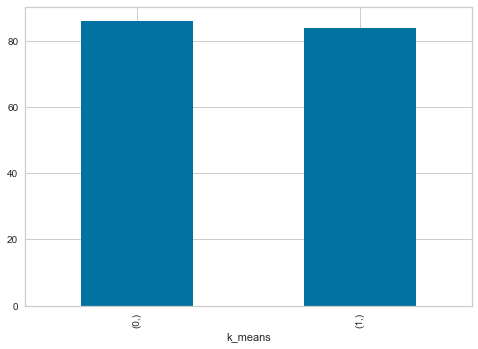

In [103]:
kmeans_bar(X_LDP, 2)

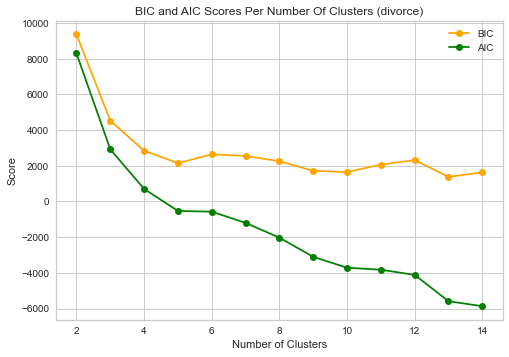

In [104]:
em(X_PCA,data_name)

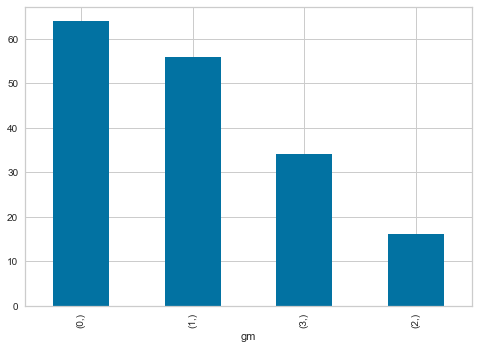

In [105]:
gm_bar(X_PCA, 4)

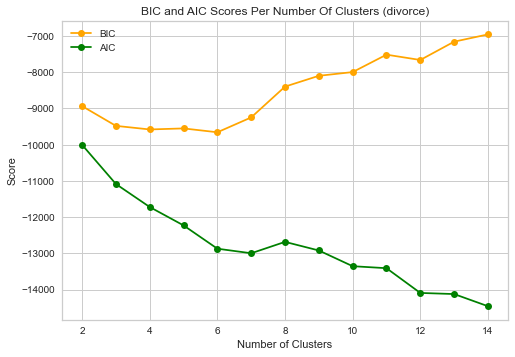

In [106]:
em(X_ICA,data_name)

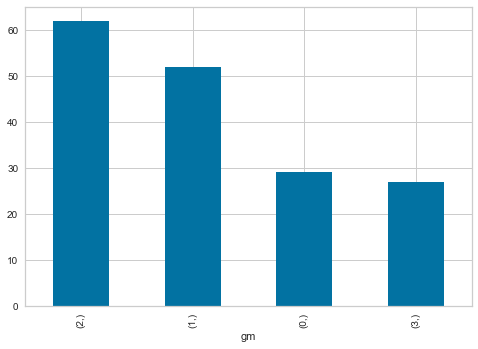

In [107]:
gm_bar(X_ICA, 4)

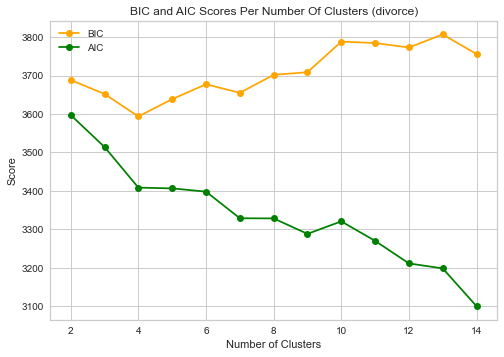

In [108]:
em(X_RP,data_name)

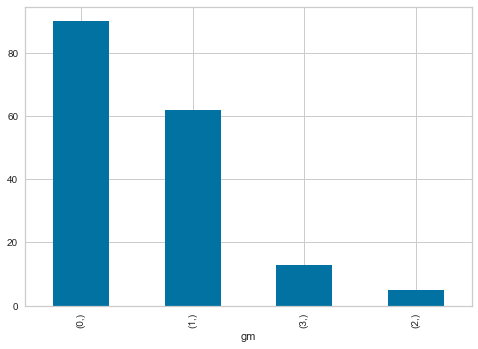

In [109]:
gm_bar(X_RP, 4)

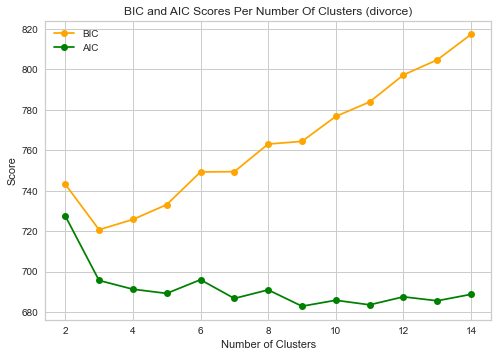

In [110]:
em(X_LDP,data_name)

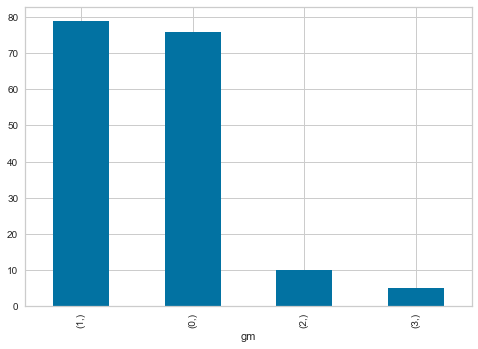

In [111]:
gm_bar(X_LDP, 4)

In [112]:
base_train_score, base_test_score, base_train_time, base_test_time = NN(X_base_train, X_base_test, y_base_train.values.ravel(), y_base_test.values.ravel())

Training Time: 281.44873046875
Testing Time: 2.814697265625
Training Time: 275.44384765625
Testing Time: 1.835693359375
Training Time: 183.9072265625
Testing Time: 2.873046875
Training Time: 225.443115234375
Testing Time: 1.971923828125
Training Time: 150.11279296875
Testing Time: 1.9541015625
Training Time: 227.345703125
Testing Time: 2.000732421875
Training Time: 122.587890625
Testing Time: 1.85302734375
Training Time: 172.35888671875
Testing Time: 1.732177734375
Training Time: 108.953369140625
Testing Time: 1.677978515625
Training Time: 141.395263671875
Testing Time: 1.748779296875


In [113]:
pca_train_score, pca_test_score, pca_train_time, pca_test_time = NN(X_PCA_train, X_PCA_test, y_PCA_train.values.ravel(), y_PCA_test.values.ravel())

Training Time: 191.707763671875
Testing Time: 0.798095703125
Training Time: 214.19189453125
Testing Time: 1.27099609375
Training Time: 164.39697265625
Testing Time: 0.60595703125
Training Time: 124.376953125
Testing Time: 0.69873046875
Training Time: 153.913330078125
Testing Time: 1.44970703125
Training Time: 153.31201171875
Testing Time: 0.7158203125
Training Time: 141.760009765625
Testing Time: 1.10791015625
Training Time: 154.656982421875
Testing Time: 0.9990234375
Training Time: 89.8310546875
Testing Time: 0.9228515625
Training Time: 111.566650390625
Testing Time: 0.799072265625


In [114]:
ica_train_score, ica_test_score, ica_train_time, ica_test_time = NN(X_ICA_train, X_ICA_test, y_ICA_train.values.ravel(), y_ICA_test.values.ravel())

Training Time: 830.792236328125
Testing Time: 1.85693359375
Training Time: 759.02783203125
Testing Time: 0.775146484375
Training Time: 682.156982421875
Testing Time: 1.088623046875
Training Time: 706.43505859375
Testing Time: 1.19287109375
Training Time: 713.977783203125
Testing Time: 0.85205078125
Training Time: 627.468994140625
Testing Time: 0.68505859375
Training Time: 584.28564453125
Testing Time: 1.179931640625
Training Time: 555.305908203125
Testing Time: 0.999755859375
Training Time: 537.1201171875
Testing Time: 1.033935546875
Training Time: 478.97509765625
Testing Time: 1.225830078125


In [115]:
rp_train_score, rp_test_score, rp_train_time, rp_test_time = NN(X_RP_train, X_RP_test, y_RP_train.values.ravel(), y_RP_test.values.ravel())

Training Time: 140.30712890625
Testing Time: 0.712158203125
Training Time: 914.02587890625
Testing Time: 1.18408203125
Training Time: 215.48388671875
Testing Time: 1.791015625
Training Time: 561.465087890625
Testing Time: 0.872314453125
Training Time: 279.050048828125
Testing Time: 0.6689453125
Training Time: 293.322998046875
Testing Time: 0.940185546875
Training Time: 393.099853515625
Testing Time: 0.98291015625
Training Time: 413.76904296875
Testing Time: 1.461181640625
Training Time: 380.477294921875
Testing Time: 0.684814453125
Training Time: 260.34912109375
Testing Time: 0.838134765625


In [116]:
ldp_train_score, ldp_test_score, ldp_train_time, ldp_test_time = NN(X_LDP_train, X_LDP_test, y_LDP_train.values.ravel(), y_LDP_test.values.ravel())

Training Time: 621.123046875
Testing Time: 0.664306640625
Training Time: 447.5400390625
Testing Time: 0.81103515625
Training Time: 393.565185546875
Testing Time: 0.73291015625
Training Time: 312.576904296875
Testing Time: 1.135986328125
Training Time: 301.73193359375
Testing Time: 1.27099609375
Training Time: 463.3798828125
Testing Time: 1.456298828125
Training Time: 220.35205078125
Testing Time: 1.6435546875
Training Time: 240.609130859375
Testing Time: 0.71728515625
Training Time: 199.0048828125
Testing Time: 0.977294921875
Training Time: 280.92626953125
Testing Time: 0.994873046875


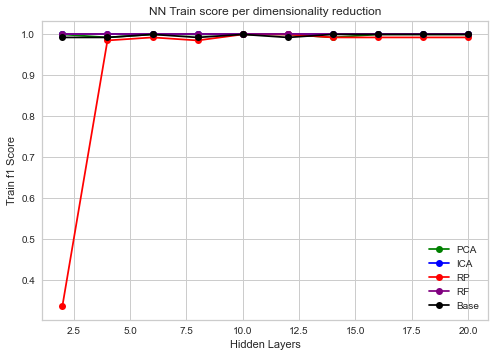

In [117]:
plot_nn("NN Train score per dimensionality reduction","Train f1 Score",base_train_score,pca_train_score,ica_train_score,rp_train_score,ldp_train_score)

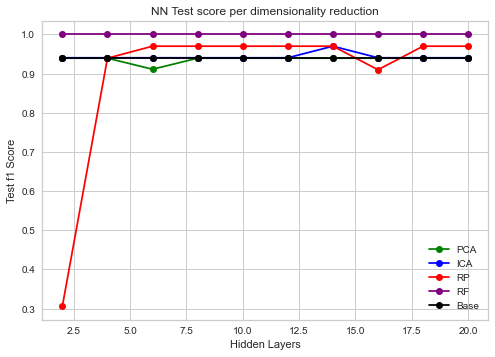

In [118]:
plot_nn("NN Test score per dimensionality reduction","Test f1 Score",base_test_score,pca_test_score,ica_test_score,rp_test_score,ldp_test_score)

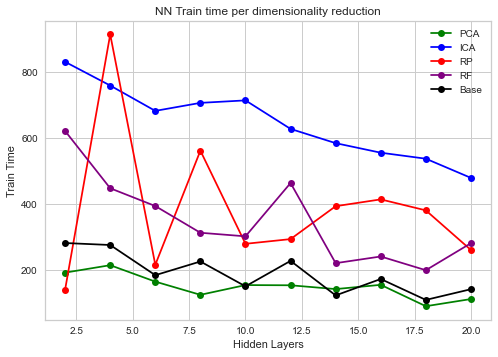

In [119]:
plot_nn("NN Train time per dimensionality reduction","Train Time",base_train_time,pca_train_time,ica_train_time,rp_train_time,ldp_train_time)

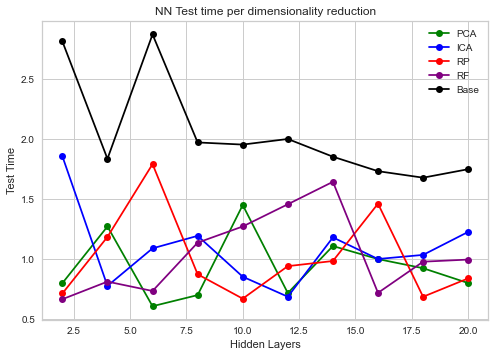

In [120]:
plot_nn("NN Test time per dimensionality reduction","Test Time",base_test_time ,pca_test_time,ica_test_time,rp_test_time,ldp_test_time)

In [121]:
k_means_clustering = KMeans(n_clusters=2,random_state=234).fit(X)

In [122]:
k_means_clustering.predict(X)
kmeans_labels = pd.DataFrame(data = k_means_clustering.predict(X), columns=['k_means'])

<AxesSubplot:xlabel='k_means'>

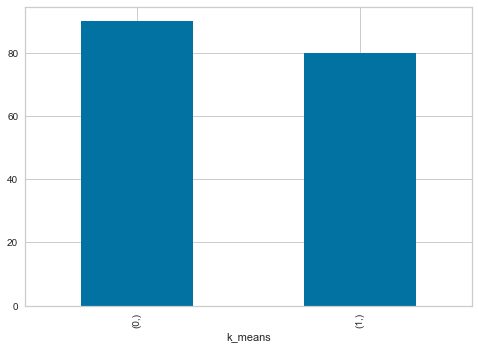

In [123]:
kmeans_labels.value_counts().plot(kind='bar')

In [124]:
gm = GaussianMixture(n_components=4, covariance_type='full')
gm.fit(X)

GaussianMixture(n_components=4)

In [125]:
gm.predict(X)
gm_labels = pd.DataFrame(data = gm.predict(X), columns=['gmm'])

<AxesSubplot:xlabel='gmm'>

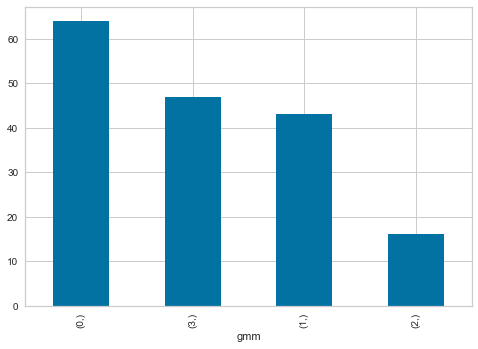

In [126]:
gm_labels.value_counts().plot(kind='bar')